In [1]:
import numpy as np
import pandas as pd
import torch
from torch.utils.data import DataLoader,Dataset
from sklearn.model_selection import train_test_split
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from torch.utils.data import Dataset
import matplotlib.pyplot as plt
from scipy.stats import wasserstein_distance
from DataLoader import MyDataset
from DataPreprocessing import DataPreprocessing
from UseNeuralNetwork import UseNeuralNetwork
from  Models import *
from Genetic import GeneticAlgorithm

# Data PreProcessing

In [2]:
dataframe =pd.read_csv("../intern_data/data.csv") 
weights = pd.read_csv("../intern_data/weights.csv",header=None)

In [3]:
preprocess = DataPreprocessing(dataframe,weights)

In [4]:
preprocess.dataframe

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,...,P4,P5,P6,P7,P8,P9,P10,A,G,C
0,1,4,2,3,3,2,3,4,4,3,...,4,4,5,1,2,5,2,17,1,US
1,4,3,4,3,4,4,4,4,2,2,...,2,3,2,3,2,2,2,37,1,US
2,3,4,4,4,4,4,4,3,2,2,...,2,4,2,2,3,3,3,31,1,US
3,4,5,4,4,4,3,3,2,2,2,...,2,3,4,2,3,4,4,32,1,US
4,4,0,4,4,4,3,5,1,2,4,...,3,4,3,4,2,3,2,46,2,NZ
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49154,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,24,1,IN
49155,4,5,4,4,4,3,5,3,2,3,...,4,2,3,3,4,4,4,22,1,ZA
49156,2,4,2,3,3,3,4,4,2,4,...,4,3,2,3,4,5,4,29,2,BE
49157,4,4,4,4,4,4,4,4,1,3,...,3,4,2,2,4,5,4,48,1,CZ


In [5]:
preprocess.CorrectData()

In [6]:
preprocess.dataframe

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,...,P4,P5,P6,P7,P8,P9,P10,A,G,C
0,1,4,2,3,3,2,3,-4,-4,-3,...,4,4,5,1,-2,-5,-2,17,1,-1.000000
1,4,3,4,3,4,4,4,-4,-2,-2,...,2,3,2,3,-2,-2,-2,37,1,-1.000000
2,3,4,4,4,4,4,4,-3,-2,-2,...,2,4,2,2,-3,-3,-3,31,1,-1.000000
3,4,5,4,4,4,3,3,-2,-2,-2,...,2,3,4,2,-3,-4,-4,32,1,-1.000000
4,4,0,4,4,4,3,5,-1,-2,-4,...,3,4,3,4,-2,-3,-2,46,2,-0.987421
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49154,1,1,1,1,1,1,1,-1,-1,-1,...,1,1,1,1,-1,-1,-1,24,1,-0.924528
49155,4,5,4,4,4,3,5,-3,-2,-3,...,4,2,3,3,-4,-4,-4,22,1,-0.861635
49156,2,4,2,3,3,3,4,-4,-2,-4,...,4,3,2,3,-4,-5,-4,29,2,-0.496855
49157,4,4,4,4,4,4,4,-4,-1,-3,...,3,4,2,2,-4,-5,-4,48,1,-0.509434


In [7]:
train_data, test_data = preprocess.SplitData(train_size=0.9)

In [8]:
preprocess.SaveTrainMean(train_data)
train_mean = preprocess.train_mean


In [9]:
scaled_train_data= preprocess.NormalizeData(train_data)
scaled_test_data= preprocess.NormalizeData(test_data)

In [10]:
scaled_train_data

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,...,P4,P5,P6,P7,P8,P9,P10,A,G,C
44901,0.385643,0.345546,0.343570,0.104385,0.048763,0.379837,0.037113,-0.297151,0.325682,0.121937,...,-0.602723,-0.171333,0.258113,-0.228181,-0.591648,-0.387690,-0.439650,-0.402597,-1,-0.924528
33407,-0.185786,0.059832,0.057856,0.104385,-0.236951,-0.191591,0.037113,0.274277,-0.531461,-0.449492,...,-0.317009,0.685810,-0.027601,-0.228181,0.265495,0.183739,-0.153936,-0.922078,0,-0.886792
3800,0.099929,0.059832,0.057856,0.104385,0.048763,0.094123,-0.820030,-0.297151,-0.531461,-0.449492,...,-0.317009,0.400096,0.258113,0.343247,-0.020220,0.183739,-0.153936,-0.532468,-1,-0.735849
37970,0.099929,0.059832,0.343570,0.390099,0.334477,0.094123,0.322828,0.559992,0.325682,0.121937,...,-0.031295,0.114381,0.258113,-0.513896,-0.305934,-0.101976,-0.153936,-0.870130,0,-0.823899
24590,-0.185786,0.059832,0.057856,0.104385,-0.236951,-0.191591,-0.248601,-0.297151,0.325682,0.121937,...,-0.317009,-0.171333,0.543828,-0.228181,0.265495,-0.101976,-0.153936,-0.896104,0,-0.886792
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44775,0.099929,0.059832,0.057856,-0.181330,0.048763,0.094123,0.037113,-0.297151,0.039968,0.121937,...,-0.317009,-0.171333,-0.313315,-0.228181,-0.305934,-0.101976,0.131779,-0.896104,0,-1.000000
8005,-0.185786,0.059832,0.343570,0.104385,0.048763,0.094123,0.037113,0.274277,0.039968,-0.163777,...,0.254420,0.114381,-0.027601,-0.228181,-0.020220,-0.387690,-0.153936,-0.688312,0,-0.924528
39533,-0.471500,0.059832,-0.513573,-0.467044,0.048763,-0.191591,-0.534315,-0.297151,0.039968,-0.449492,...,0.540134,-0.171333,-0.599029,-0.513896,0.265495,-0.101976,0.417493,-0.844156,-1,-0.635220
11513,0.099929,0.059832,0.057856,0.104385,0.334477,0.379837,0.322828,-0.297151,0.039968,-0.449492,...,-0.317009,0.114381,-0.027601,-0.228181,-0.020220,-0.101976,-0.439650,-0.636364,0,-0.899371


In [11]:
scaled_test_data

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,...,P4,P5,P6,P7,P8,P9,P10,A,G,C
7822,-0.185786,0.345546,0.343570,0.390099,0.048763,0.379837,0.322828,-0.297151,0.325682,0.407651,...,0.254420,-0.171333,-0.313315,0.628961,-0.020220,-0.387690,-0.439650,-0.844156,0,-1.000000
40829,0.099929,0.059832,0.343570,0.104385,-0.236951,0.094123,0.037113,0.274277,0.039968,0.121937,...,-0.602723,0.400096,-0.027601,-0.513896,-0.020220,0.183739,-0.439650,-0.792208,0,-0.635220
24604,0.099929,0.059832,0.057856,-0.181330,0.048763,-0.191591,0.037113,-0.582865,0.325682,-0.449492,...,-0.031295,-0.171333,0.258113,-0.228181,-0.305934,-0.101976,0.417493,-0.896104,-1,-0.886792
42579,0.099929,0.345546,-0.227858,-0.467044,0.048763,0.094123,-0.534315,0.274277,0.039968,0.121937,...,0.254420,-0.457047,-0.027601,-0.513896,0.265495,-0.101976,-0.153936,-0.740260,1,-1.000000
24278,-0.471500,-0.225882,-0.513573,-0.467044,-0.236951,-0.191591,0.037113,-0.011437,-0.531461,0.121937,...,-0.317009,0.114381,-0.313315,-0.513896,0.265495,-0.101976,0.417493,-0.532468,-1,-0.635220
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14136,0.385643,0.059832,0.343570,0.104385,0.048763,-0.477306,0.037113,0.274277,0.325682,-0.163777,...,-0.317009,0.685810,0.258113,0.343247,0.551209,-0.101976,0.417493,-0.870130,0,-0.823899
4370,0.385643,0.345546,0.343570,0.104385,0.048763,0.094123,0.322828,0.559992,0.325682,0.407651,...,0.254420,-0.171333,-0.313315,0.343247,0.265495,-0.101976,-0.439650,-0.610390,0,-1.000000
27161,0.099929,0.345546,0.057856,0.104385,0.048763,0.094123,0.037113,-0.297151,0.039968,-0.449492,...,-0.031295,0.114381,0.258113,-0.228181,-0.020220,-0.101976,0.131779,-0.870130,0,-1.000000
5171,0.099929,0.059832,0.057856,0.104385,-0.236951,0.094123,0.037113,0.274277,0.039968,-0.163777,...,0.540134,0.114381,0.258113,0.343247,0.265495,0.183739,-0.153936,-0.428571,0,-0.823899


In [12]:
indices = preprocess.RandomChoice()

In [13]:
x_train,x_test,y_train,y_test = preprocess.GetAiInput(scaled_train_data,scaled_test_data,indices) #normalized


In [14]:
x_train

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,...,P4,P5,P6,P7,P8,P9,P10,A,G,C
0,-1.360747e-16,-3.780271e-16,0.343570,-8.813742e-17,1.211330e-16,0.379837,1.397236e-16,-1.974879e-16,-1.025648e-16,4.169155e-16,...,2.680942e-16,-6.303576e-16,0.258113,-6.552293e-16,-1.364172e-16,1.341556e-16,4.630984e-16,-0.402597,-1.0,-0.924528
1,-1.360747e-16,-3.780271e-16,0.057856,-8.813742e-17,1.211330e-16,-0.191591,1.397236e-16,-1.974879e-16,-1.025648e-16,4.169155e-16,...,2.680942e-16,-6.303576e-16,-0.027601,-6.552293e-16,-1.364172e-16,1.341556e-16,4.630984e-16,-0.922078,0.0,-0.886792
2,-1.360747e-16,-3.780271e-16,0.057856,-8.813742e-17,1.211330e-16,0.094123,1.397236e-16,-1.974879e-16,-1.025648e-16,4.169155e-16,...,2.680942e-16,-6.303576e-16,0.258113,-6.552293e-16,-1.364172e-16,1.341556e-16,4.630984e-16,-0.532468,-1.0,-0.735849
3,-1.360747e-16,-3.780271e-16,0.343570,-8.813742e-17,1.211330e-16,0.094123,1.397236e-16,-1.974879e-16,-1.025648e-16,4.169155e-16,...,2.680942e-16,-6.303576e-16,0.258113,-6.552293e-16,-1.364172e-16,1.341556e-16,4.630984e-16,-0.870130,0.0,-0.823899
4,-1.360747e-16,-3.780271e-16,0.057856,-8.813742e-17,1.211330e-16,-0.191591,1.397236e-16,-1.974879e-16,-1.025648e-16,4.169155e-16,...,2.680942e-16,-6.303576e-16,0.543828,-6.552293e-16,-1.364172e-16,1.341556e-16,4.630984e-16,-0.896104,0.0,-0.886792
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44238,-1.360747e-16,-3.780271e-16,0.057856,-8.813742e-17,1.211330e-16,0.094123,1.397236e-16,-1.974879e-16,-1.025648e-16,4.169155e-16,...,2.680942e-16,-6.303576e-16,-0.313315,-6.552293e-16,-1.364172e-16,1.341556e-16,4.630984e-16,-0.896104,0.0,-1.000000
44239,-1.360747e-16,-3.780271e-16,0.343570,-8.813742e-17,1.211330e-16,0.094123,1.397236e-16,-1.974879e-16,-1.025648e-16,4.169155e-16,...,2.680942e-16,-6.303576e-16,-0.027601,-6.552293e-16,-1.364172e-16,1.341556e-16,4.630984e-16,-0.688312,0.0,-0.924528
44240,-1.360747e-16,-3.780271e-16,-0.513573,-8.813742e-17,1.211330e-16,-0.191591,1.397236e-16,-1.974879e-16,-1.025648e-16,4.169155e-16,...,2.680942e-16,-6.303576e-16,-0.599029,-6.552293e-16,-1.364172e-16,1.341556e-16,4.630984e-16,-0.844156,-1.0,-0.635220
44241,-1.360747e-16,-3.780271e-16,0.057856,-8.813742e-17,1.211330e-16,0.379837,1.397236e-16,-1.974879e-16,-1.025648e-16,4.169155e-16,...,2.680942e-16,-6.303576e-16,-0.027601,-6.552293e-16,-1.364172e-16,1.341556e-16,4.630984e-16,-0.636364,0.0,-0.899371


In [15]:
x_test

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,...,P4,P5,P6,P7,P8,P9,P10,A,G,C
0,-1.360747e-16,-3.780271e-16,0.343570,-8.813742e-17,1.211330e-16,0.379837,1.397236e-16,-1.974879e-16,-1.025648e-16,4.169155e-16,...,2.680942e-16,-6.303576e-16,-0.313315,-6.552293e-16,-1.364172e-16,1.341556e-16,4.630984e-16,-0.844156,0.0,-1.000000
1,-1.360747e-16,-3.780271e-16,0.343570,-8.813742e-17,1.211330e-16,0.094123,1.397236e-16,-1.974879e-16,-1.025648e-16,4.169155e-16,...,2.680942e-16,-6.303576e-16,-0.027601,-6.552293e-16,-1.364172e-16,1.341556e-16,4.630984e-16,-0.792208,0.0,-0.635220
2,-1.360747e-16,-3.780271e-16,0.057856,-8.813742e-17,1.211330e-16,-0.191591,1.397236e-16,-1.974879e-16,-1.025648e-16,4.169155e-16,...,2.680942e-16,-6.303576e-16,0.258113,-6.552293e-16,-1.364172e-16,1.341556e-16,4.630984e-16,-0.896104,-1.0,-0.886792
3,-1.360747e-16,-3.780271e-16,-0.227858,-8.813742e-17,1.211330e-16,0.094123,1.397236e-16,-1.974879e-16,-1.025648e-16,4.169155e-16,...,2.680942e-16,-6.303576e-16,-0.027601,-6.552293e-16,-1.364172e-16,1.341556e-16,4.630984e-16,-0.740260,1.0,-1.000000
4,-1.360747e-16,-3.780271e-16,-0.513573,-8.813742e-17,1.211330e-16,-0.191591,1.397236e-16,-1.974879e-16,-1.025648e-16,4.169155e-16,...,2.680942e-16,-6.303576e-16,-0.313315,-6.552293e-16,-1.364172e-16,1.341556e-16,4.630984e-16,-0.532468,-1.0,-0.635220
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4911,-1.360747e-16,-3.780271e-16,0.343570,-8.813742e-17,1.211330e-16,-0.477306,1.397236e-16,-1.974879e-16,-1.025648e-16,4.169155e-16,...,2.680942e-16,-6.303576e-16,0.258113,-6.552293e-16,-1.364172e-16,1.341556e-16,4.630984e-16,-0.870130,0.0,-0.823899
4912,-1.360747e-16,-3.780271e-16,0.343570,-8.813742e-17,1.211330e-16,0.094123,1.397236e-16,-1.974879e-16,-1.025648e-16,4.169155e-16,...,2.680942e-16,-6.303576e-16,-0.313315,-6.552293e-16,-1.364172e-16,1.341556e-16,4.630984e-16,-0.610390,0.0,-1.000000
4913,-1.360747e-16,-3.780271e-16,0.057856,-8.813742e-17,1.211330e-16,0.094123,1.397236e-16,-1.974879e-16,-1.025648e-16,4.169155e-16,...,2.680942e-16,-6.303576e-16,0.258113,-6.552293e-16,-1.364172e-16,1.341556e-16,4.630984e-16,-0.870130,0.0,-1.000000
4914,-1.360747e-16,-3.780271e-16,0.057856,-8.813742e-17,1.211330e-16,0.094123,1.397236e-16,-1.974879e-16,-1.025648e-16,4.169155e-16,...,2.680942e-16,-6.303576e-16,0.258113,-6.552293e-16,-1.364172e-16,1.341556e-16,4.630984e-16,-0.428571,0.0,-0.823899


In [16]:
y_train

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,...,P1,P2,P3,P4,P5,P6,P7,P8,P9,P10
44901,0.385643,0.345546,0.343570,0.104385,0.048763,0.379837,0.037113,-0.297151,0.325682,0.121937,...,-0.554819,-0.478397,0.291791,-0.602723,-0.171333,0.258113,-0.228181,-0.591648,-0.387690,-0.439650
33407,-0.185786,0.059832,0.057856,0.104385,-0.236951,-0.191591,0.037113,0.274277,-0.531461,-0.449492,...,0.302324,0.664460,0.006077,-0.317009,0.685810,-0.027601,-0.228181,0.265495,0.183739,-0.153936
3800,0.099929,0.059832,0.057856,0.104385,0.048763,0.094123,-0.820030,-0.297151,-0.531461,-0.449492,...,0.302324,0.378746,0.291791,-0.317009,0.400096,0.258113,0.343247,-0.020220,0.183739,-0.153936
37970,0.099929,0.059832,0.343570,0.390099,0.334477,0.094123,0.322828,0.559992,0.325682,0.121937,...,0.016610,-0.192683,0.006077,-0.031295,0.114381,0.258113,-0.513896,-0.305934,-0.101976,-0.153936
24590,-0.185786,0.059832,0.057856,0.104385,-0.236951,-0.191591,-0.248601,-0.297151,0.325682,0.121937,...,0.302324,0.378746,0.291791,-0.317009,-0.171333,0.543828,-0.228181,0.265495,-0.101976,-0.153936
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44775,0.099929,0.059832,0.057856,-0.181330,0.048763,0.094123,0.037113,-0.297151,0.039968,0.121937,...,-0.269105,-0.192683,0.006077,-0.317009,-0.171333,-0.313315,-0.228181,-0.305934,-0.101976,0.131779
8005,-0.185786,0.059832,0.343570,0.104385,0.048763,0.094123,0.037113,0.274277,0.039968,-0.163777,...,0.302324,0.093032,-0.279637,0.254420,0.114381,-0.027601,-0.228181,-0.020220,-0.387690,-0.153936
39533,-0.471500,0.059832,-0.513573,-0.467044,0.048763,-0.191591,-0.534315,-0.297151,0.039968,-0.449492,...,-0.554819,-0.478397,-0.565352,0.540134,-0.171333,-0.599029,-0.513896,0.265495,-0.101976,0.417493
11513,0.099929,0.059832,0.057856,0.104385,0.334477,0.379837,0.322828,-0.297151,0.039968,-0.449492,...,0.016610,-0.192683,0.006077,-0.317009,0.114381,-0.027601,-0.228181,-0.020220,-0.101976,-0.439650


In [17]:
y_test

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,...,P1,P2,P3,P4,P5,P6,P7,P8,P9,P10
7822,-0.185786,0.345546,0.343570,0.390099,0.048763,0.379837,0.322828,-0.297151,0.325682,0.407651,...,0.016610,-0.192683,-0.565352,0.254420,-0.171333,-0.313315,0.628961,-0.020220,-0.387690,-0.439650
40829,0.099929,0.059832,0.343570,0.104385,-0.236951,0.094123,0.037113,0.274277,0.039968,0.121937,...,0.016610,-0.192683,-0.565352,-0.602723,0.400096,-0.027601,-0.513896,-0.020220,0.183739,-0.439650
24604,0.099929,0.059832,0.057856,-0.181330,0.048763,-0.191591,0.037113,-0.582865,0.325682,-0.449492,...,0.016610,-0.192683,0.006077,-0.031295,-0.171333,0.258113,-0.228181,-0.305934,-0.101976,0.417493
42579,0.099929,0.345546,-0.227858,-0.467044,0.048763,0.094123,-0.534315,0.274277,0.039968,0.121937,...,0.016610,-0.478397,-0.279637,0.254420,-0.457047,-0.027601,-0.513896,0.265495,-0.101976,-0.153936
24278,-0.471500,-0.225882,-0.513573,-0.467044,-0.236951,-0.191591,0.037113,-0.011437,-0.531461,0.121937,...,-0.269105,0.093032,-0.279637,-0.317009,0.114381,-0.313315,-0.513896,0.265495,-0.101976,0.417493
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14136,0.385643,0.059832,0.343570,0.104385,0.048763,-0.477306,0.037113,0.274277,0.325682,-0.163777,...,0.302324,0.378746,0.291791,-0.317009,0.685810,0.258113,0.343247,0.551209,-0.101976,0.417493
4370,0.385643,0.345546,0.343570,0.104385,0.048763,0.094123,0.322828,0.559992,0.325682,0.407651,...,-0.269105,0.378746,-0.279637,0.254420,-0.171333,-0.313315,0.343247,0.265495,-0.101976,-0.439650
27161,0.099929,0.345546,0.057856,0.104385,0.048763,0.094123,0.037113,-0.297151,0.039968,-0.449492,...,0.016610,0.093032,-0.279637,-0.031295,0.114381,0.258113,-0.228181,-0.020220,-0.101976,0.131779
5171,0.099929,0.059832,0.057856,0.104385,-0.236951,0.094123,0.037113,0.274277,0.039968,-0.163777,...,0.302324,0.378746,0.291791,0.540134,0.114381,0.258113,0.343247,0.265495,0.183739,-0.153936


In [18]:
group_split_ind = preprocess.GroupNumber()

# Net1 with only dense layers

In [27]:
input_size = 166
weights = [3,5]
num_classes = 163
lr_rate = 0.001
batch_size = 32
num_epochs = 10
model = NeuralNetwork()
lossFunction = nn.MSELoss()
#lossFunction = nn.L1Loss()
optimizer = optim.Adam(model.parameters(), lr = lr_rate) 
#optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9) 

In [28]:
Ai = UseNeuralNetwork(NeuralNetwork,x_train,x_test,y_train,y_test,indices,optimizer=optimizer,lr_rate=lr_rate,batch_size=batch_size,num_epochs=num_epochs,loss=lossFunction)


In [29]:
Ai.TrainNN(group_split_ind, weights)

Epoch: 0
loss:  tensor(20.0688, grad_fn=<DivBackward0>)
Epoch: 1
loss:  tensor(20.0699, grad_fn=<DivBackward0>)
Epoch: 2
loss:  tensor(20.0677, grad_fn=<DivBackward0>)
Epoch: 3
loss:  tensor(20.0684, grad_fn=<DivBackward0>)
Epoch: 4
loss:  tensor(20.0685, grad_fn=<DivBackward0>)
Epoch: 5
loss:  tensor(12.3874, grad_fn=<DivBackward0>)
Epoch: 6
loss:  tensor(12.3864, grad_fn=<DivBackward0>)
Epoch: 7
loss:  tensor(12.3875, grad_fn=<DivBackward0>)
Epoch: 8
loss:  tensor(12.3868, grad_fn=<DivBackward0>)
Epoch: 9
loss:  tensor(12.3872, grad_fn=<DivBackward0>)


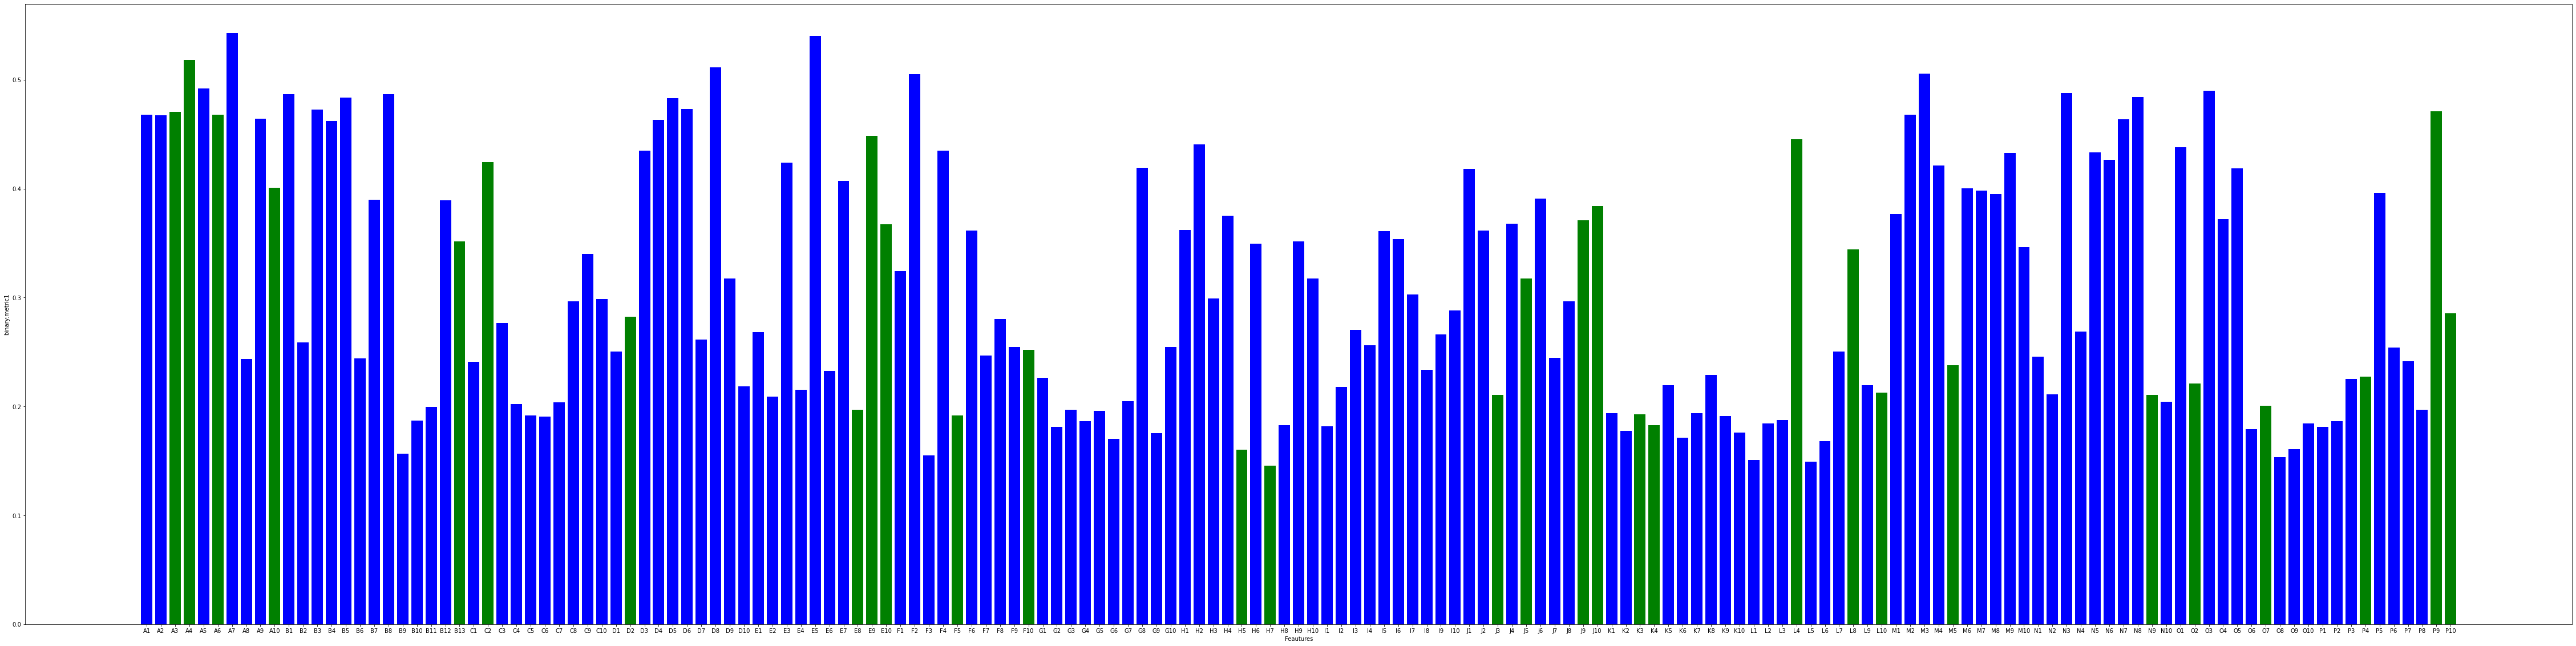

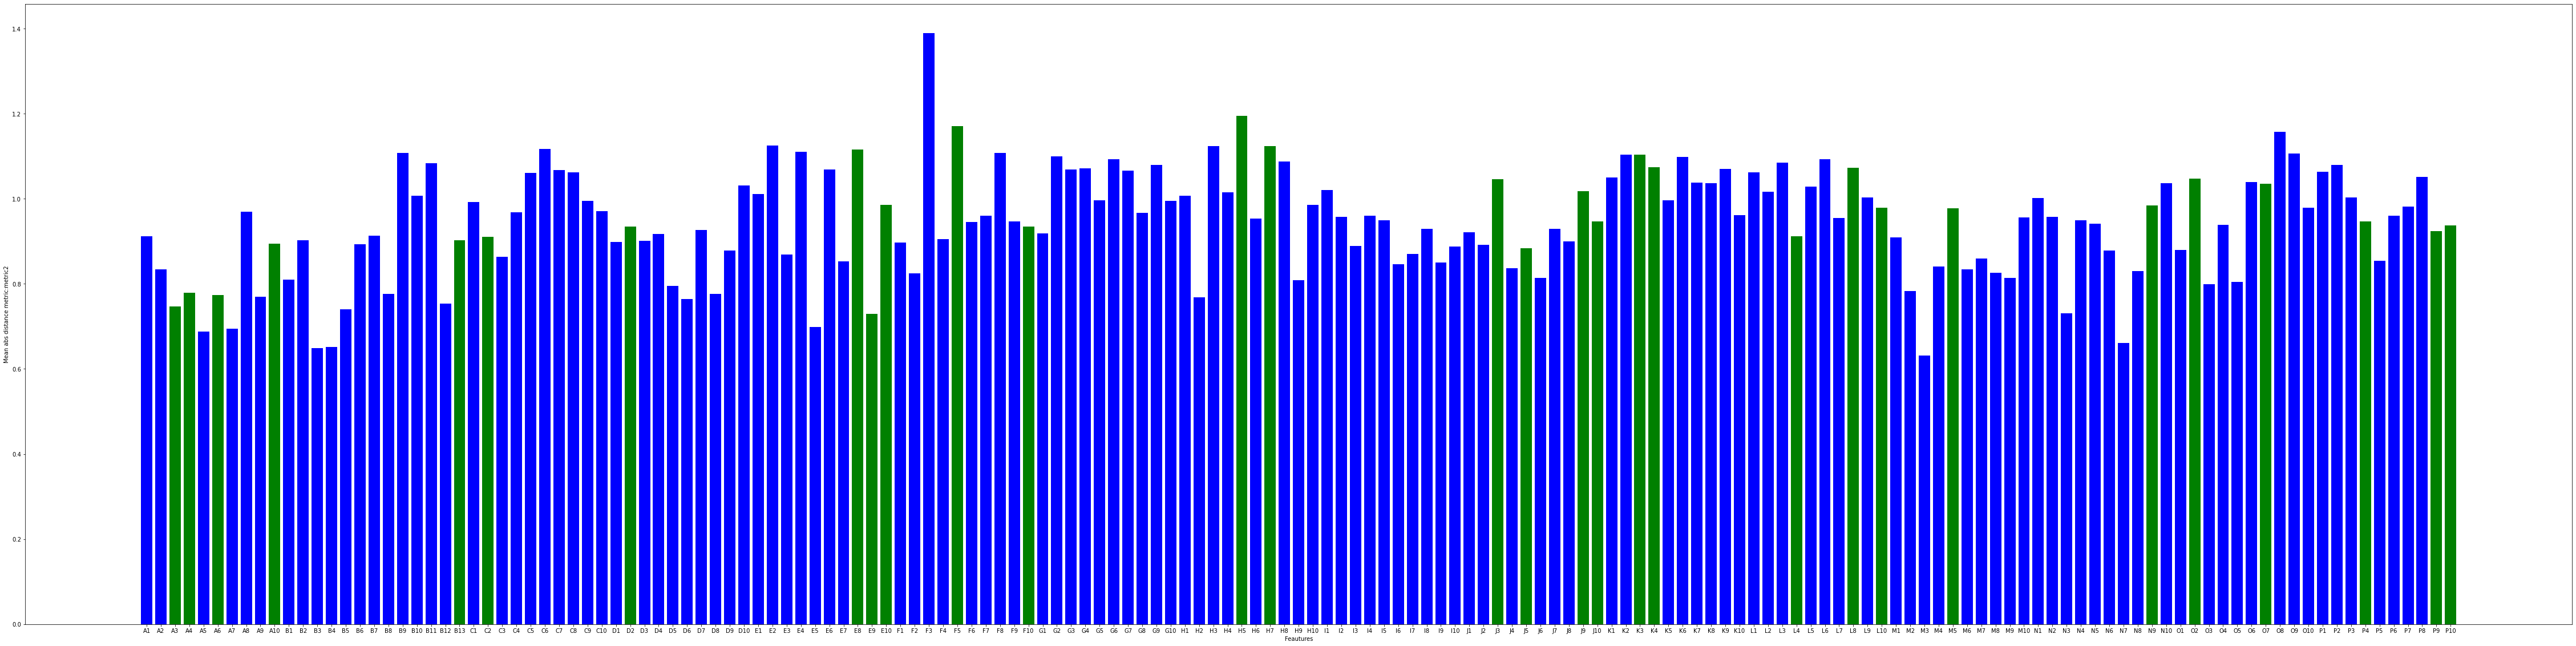

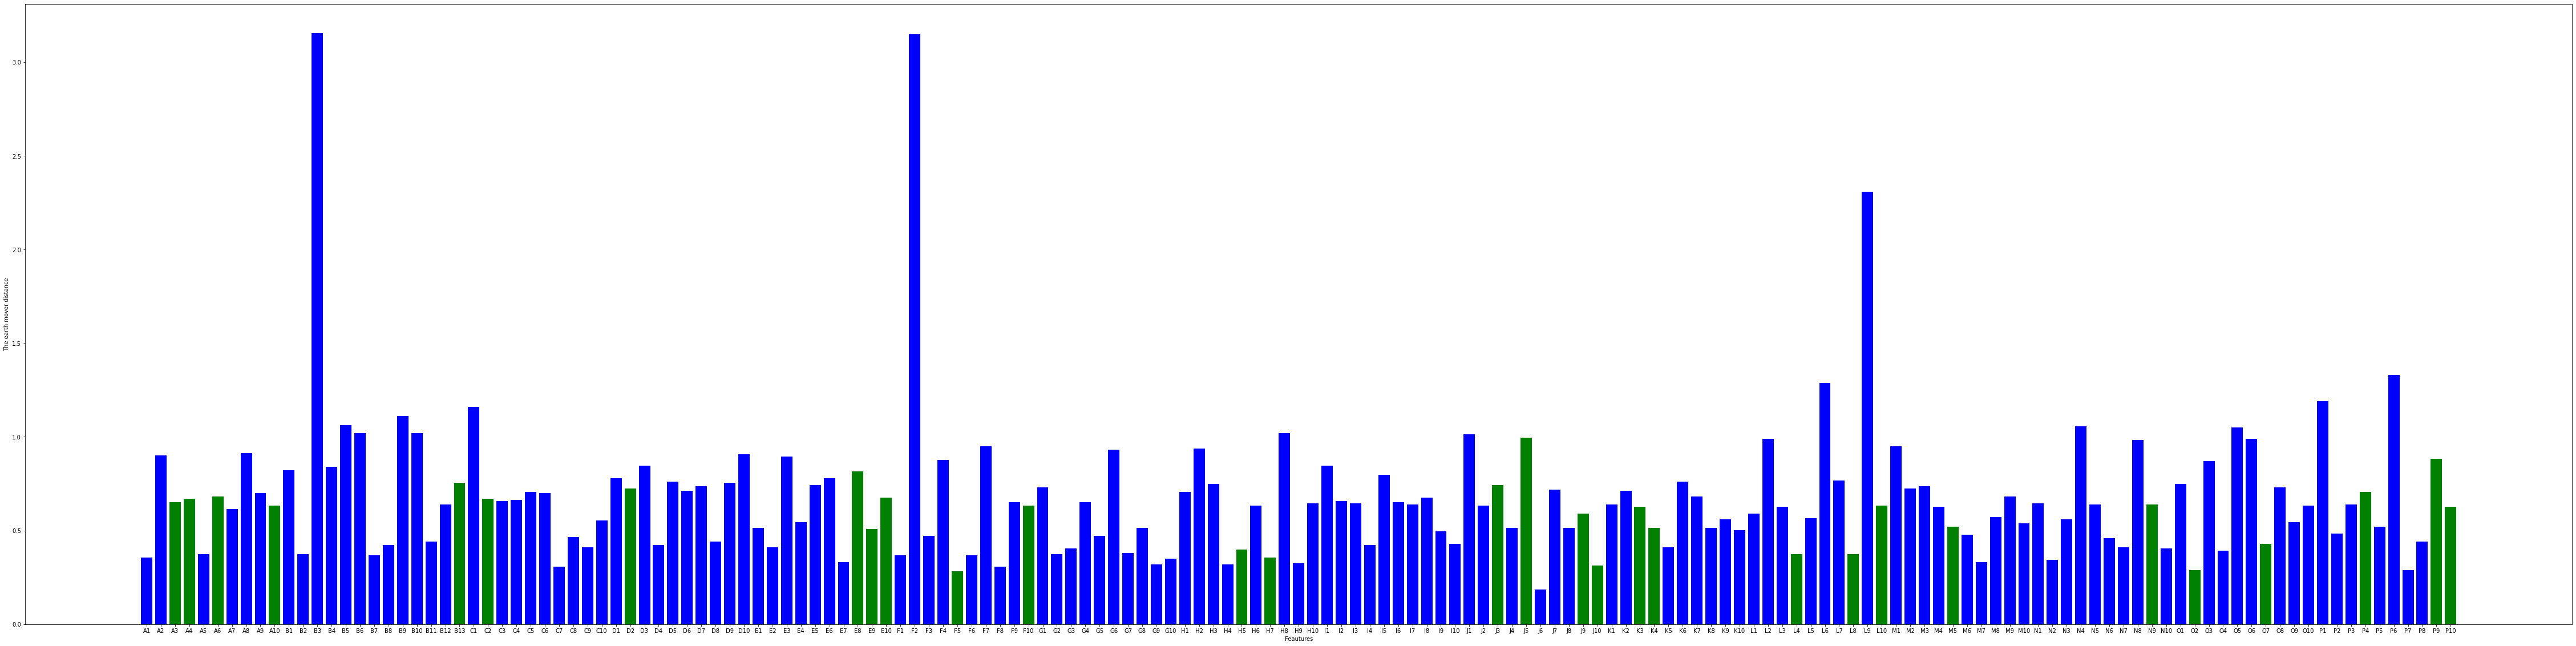

In [30]:
Ai.CheckAccuracyFeatures(Ai.x_train,preprocess.unscaled_y_train,train_mean,indices)

In [32]:
Ai.CheckAccuracy(Ai.x_train,preprocess.unscaled_y_train,train_mean)

Got 1814756 / 5884319 with accuracy 0.30841
tensor(0.9410, dtype=torch.float64)   accuracy  with second accuracy metric


In [ ]:
#w=[3,5] #test = 0.41, train = 0.42
# w = [10,4]  #test = 0.2736, train = 0.2733


In [33]:
Ai.CheckAccuracy(Ai.x_test,preprocess.unscaled_y_test,train_mean)

Got 202687 / 653828 with accuracy 0.31000
tensor(0.9345, dtype=torch.float64)   accuracy  with second accuracy metric


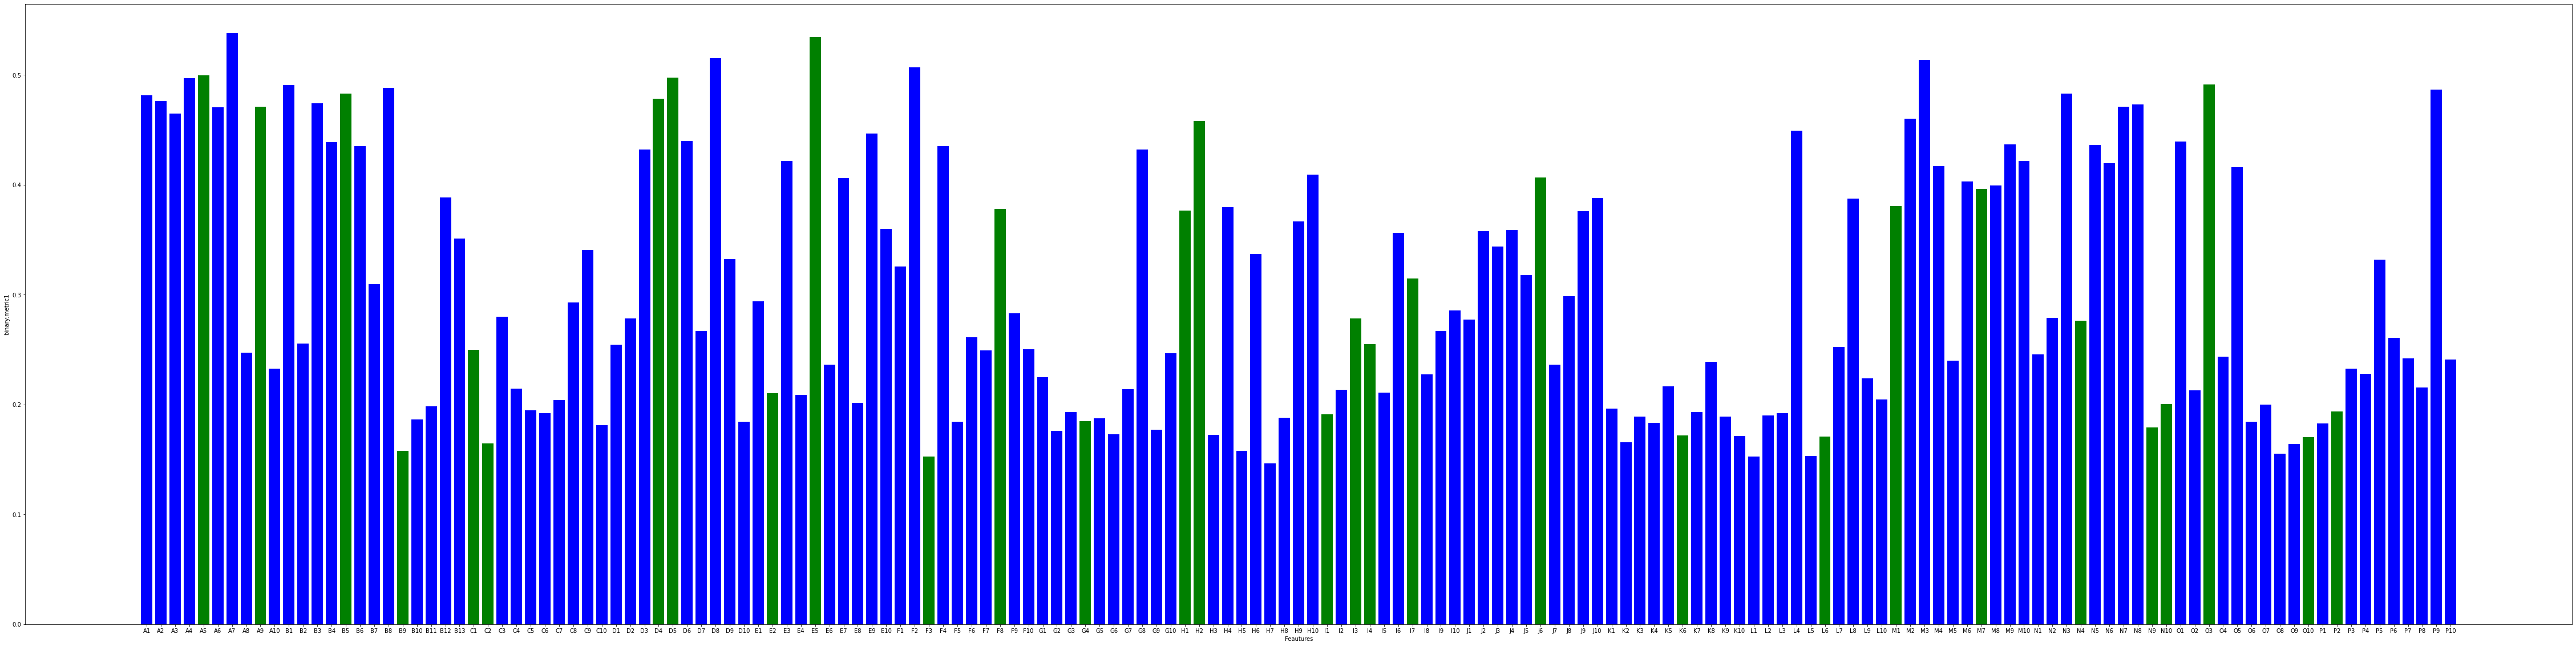

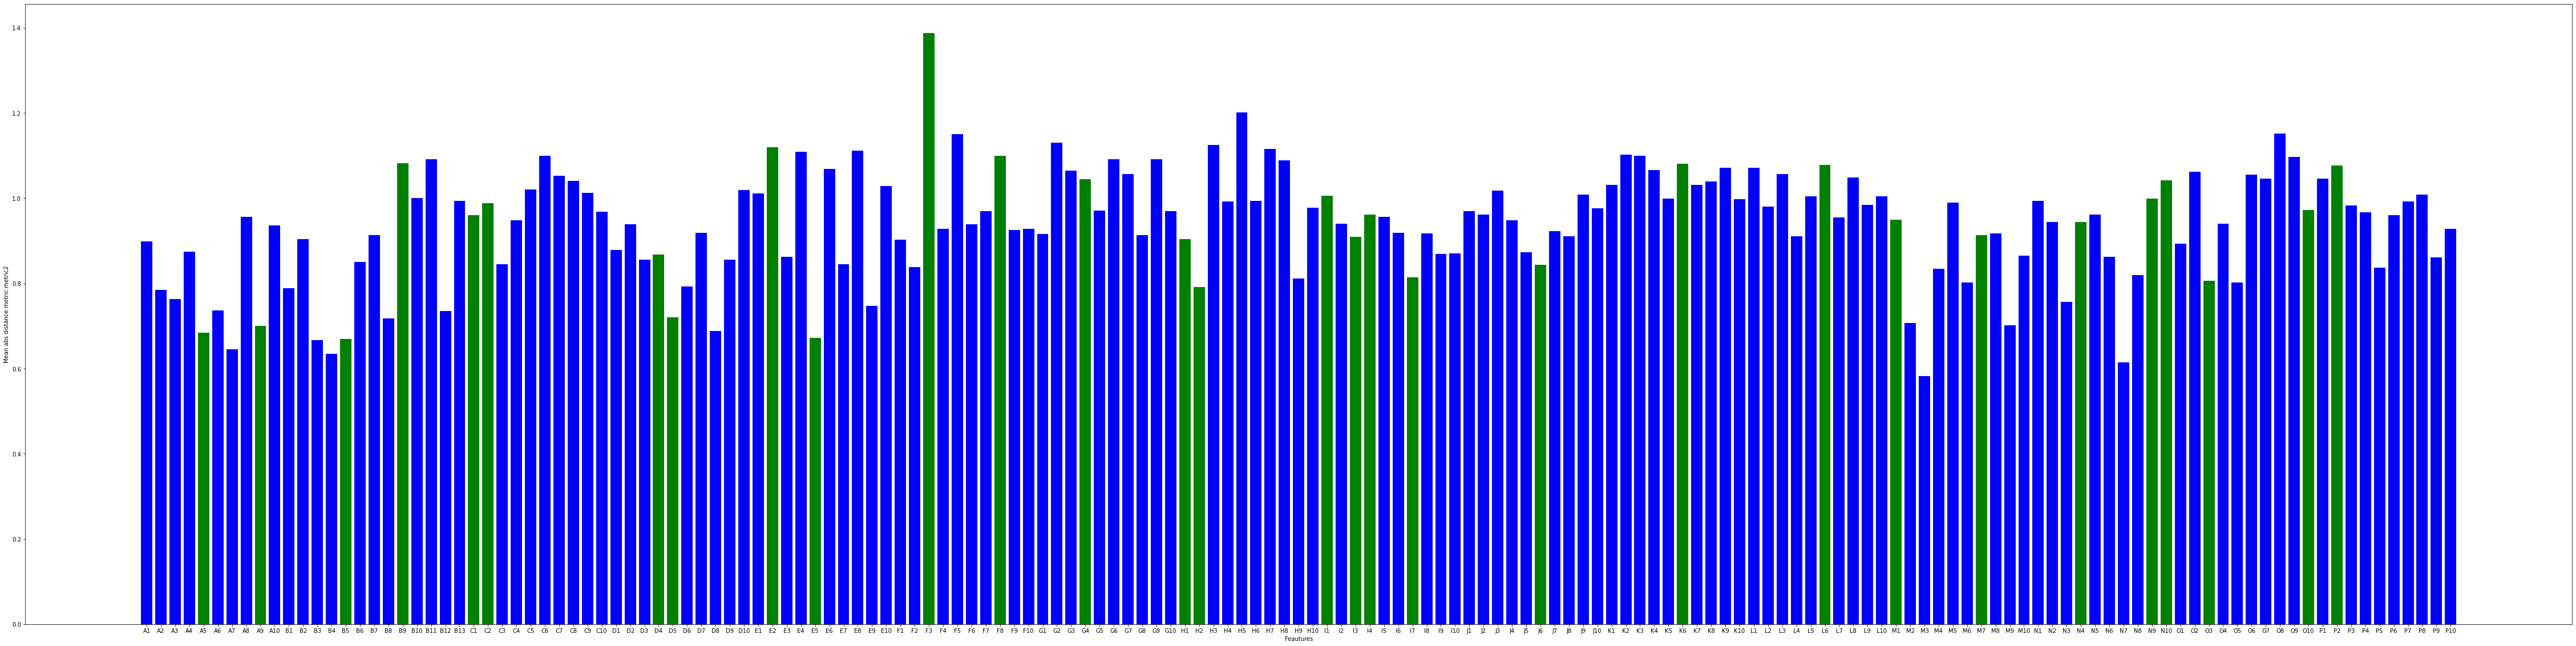

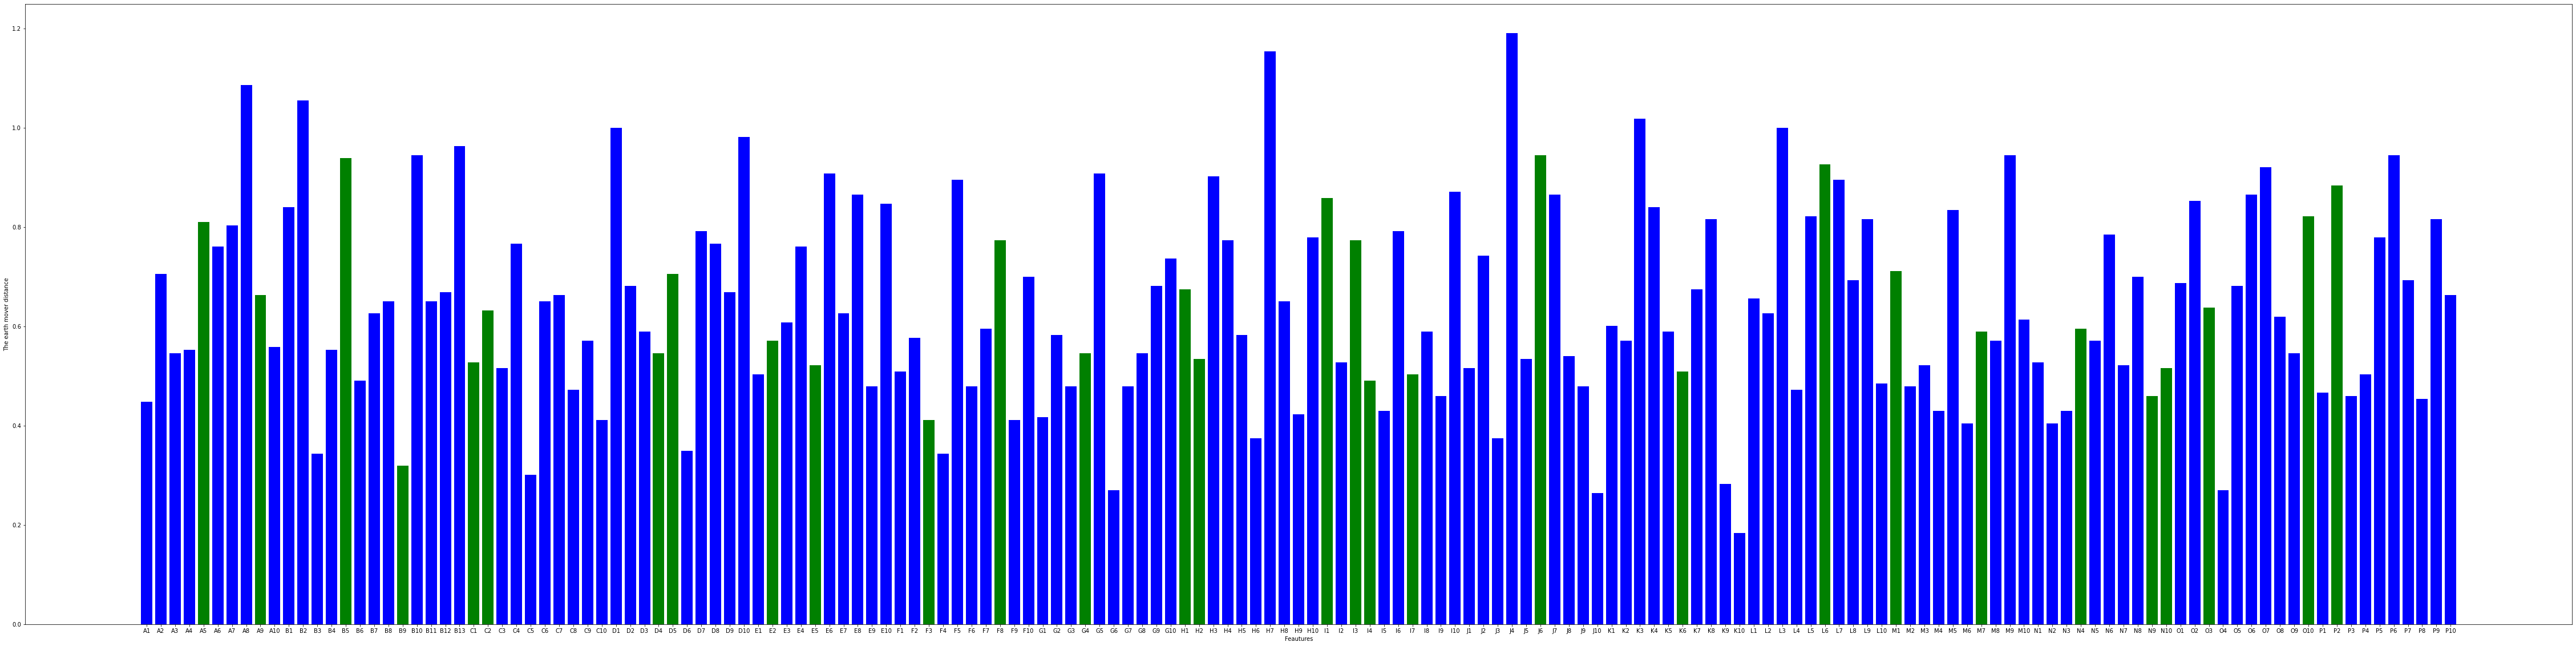

In [35]:
Ai.CheckAccuracyFeatures(Ai.x_test,preprocess.unscaled_y_test,train_mean,indices)

# Transose conv1D with batch normalization

In [147]:
#Transpose conv1D
class NeuralNetwork2(nn.Module): 
    def __init__(self):  
        super(NeuralNetwork2, self).__init__()
        self.input = nn.Linear(166,400)
        self.Tconv1d = nn.ConvTranspose1d(in_channels = 1,out_channels = 1,
                        kernel_size=101, stride=1, padding=0, 
                        output_padding=0, groups=1, bias=True, dilation=1)
        self.batch_norm = nn.BatchNorm1d(1, affine=False)        
        self.output = nn.Linear(500,163)
        self.relu = nn.ReLU()
    #L(out)=(L(in)−1)×stride−2×padding+dilation×(kernel_size−1)+output_padding+1
    def forward(self,x):
        x = self.relu(x)
        x = self.input(x)
        x = self.relu(x)
        x = self.batch_norm(x)
        x = self.Tconv1d(x)
        x = self.relu(x)
        x = self.output(x)  
        return x

In [36]:
model = NeuralNetwork2()
lossFunction = nn.SmoothL1Loss()
learning_rate = 0.01
optimizer = optim.Adam(model.parameters(), lr = learning_rate) 
batch_size = 32
num_epochs = 10
weights=[10,4]



In [40]:
Ai2 = UseNeuralNetwork(NeuralNetwork2,x_train,x_test,y_train,y_test,indices,optimizer=optimizer,lr_rate=lr_rate,batch_size=batch_size,num_epochs=num_epochs,loss=lossFunction)


In [42]:
Ai2.TrainNN(group_split_ind,weights)

Epoch: 0
loss:  tensor(5.6312, grad_fn=<DivBackward0>)
Epoch: 1
loss:  tensor(5.6312, grad_fn=<DivBackward0>)
Epoch: 2
loss:  tensor(5.6311, grad_fn=<DivBackward0>)
Epoch: 3
loss:  tensor(5.6315, grad_fn=<DivBackward0>)
Epoch: 4
loss:  tensor(5.6312, grad_fn=<DivBackward0>)
Epoch: 5
loss:  tensor(12.4689, grad_fn=<DivBackward0>)
Epoch: 6
loss:  tensor(12.4689, grad_fn=<DivBackward0>)
Epoch: 7
loss:  tensor(12.4687, grad_fn=<DivBackward0>)
Epoch: 8
loss:  tensor(12.4696, grad_fn=<DivBackward0>)
Epoch: 9
loss:  tensor(12.4687, grad_fn=<DivBackward0>)


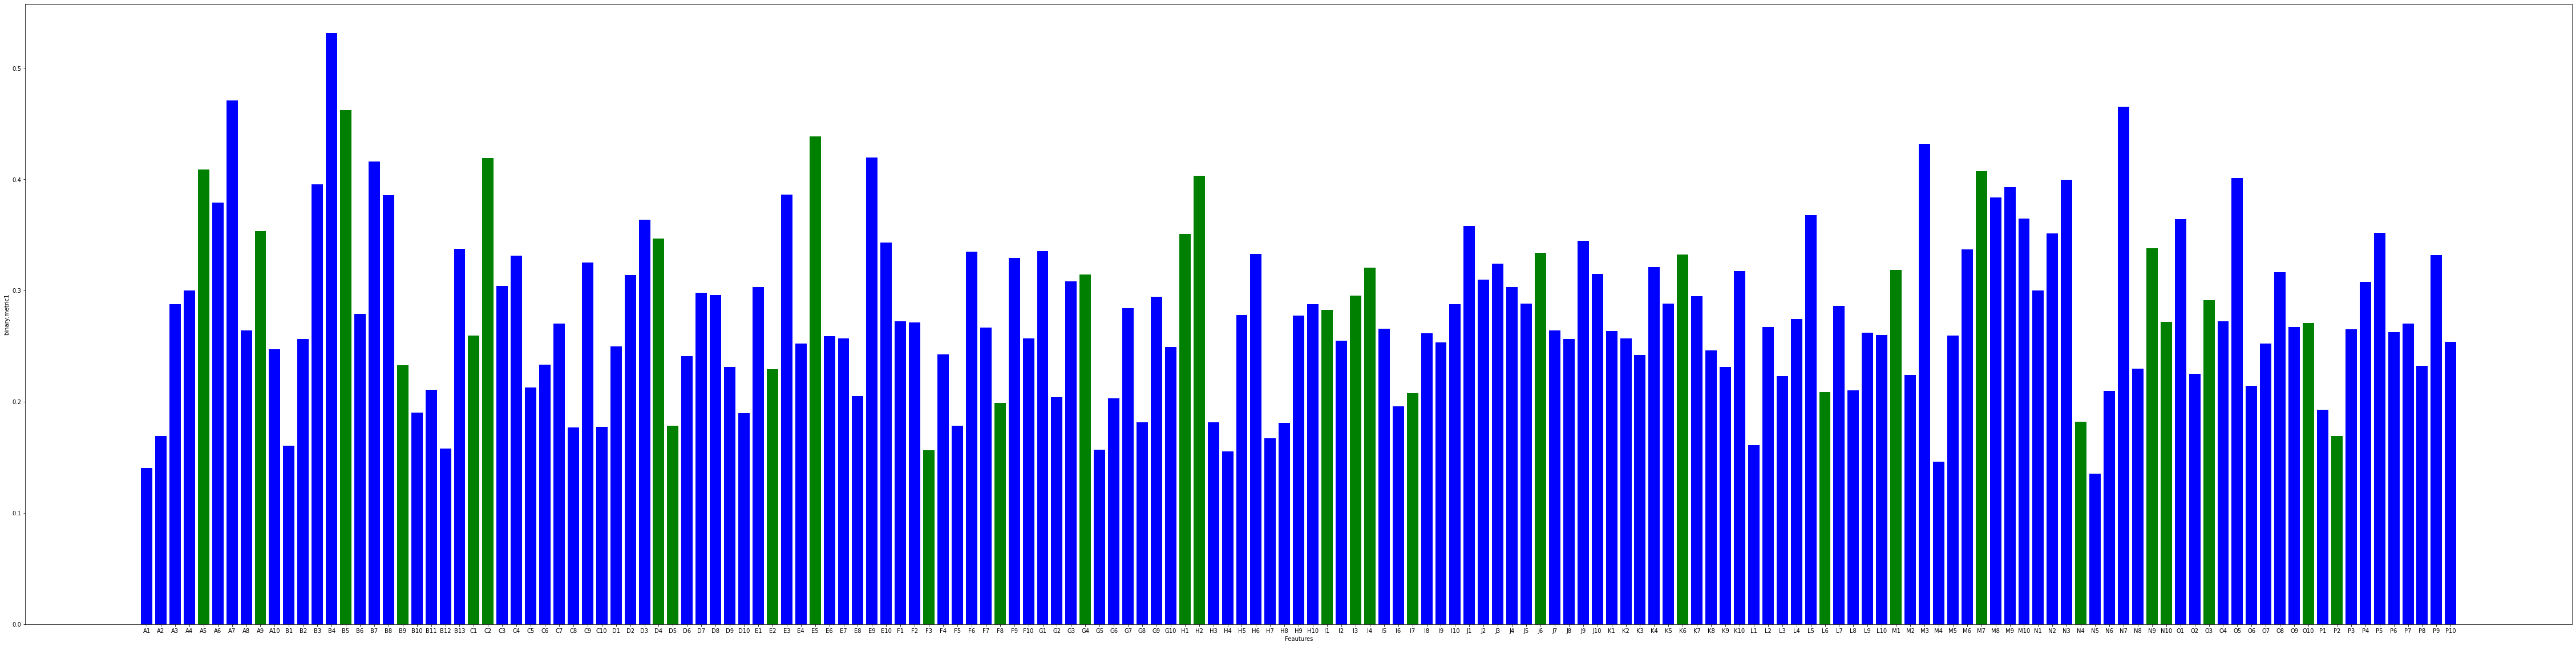

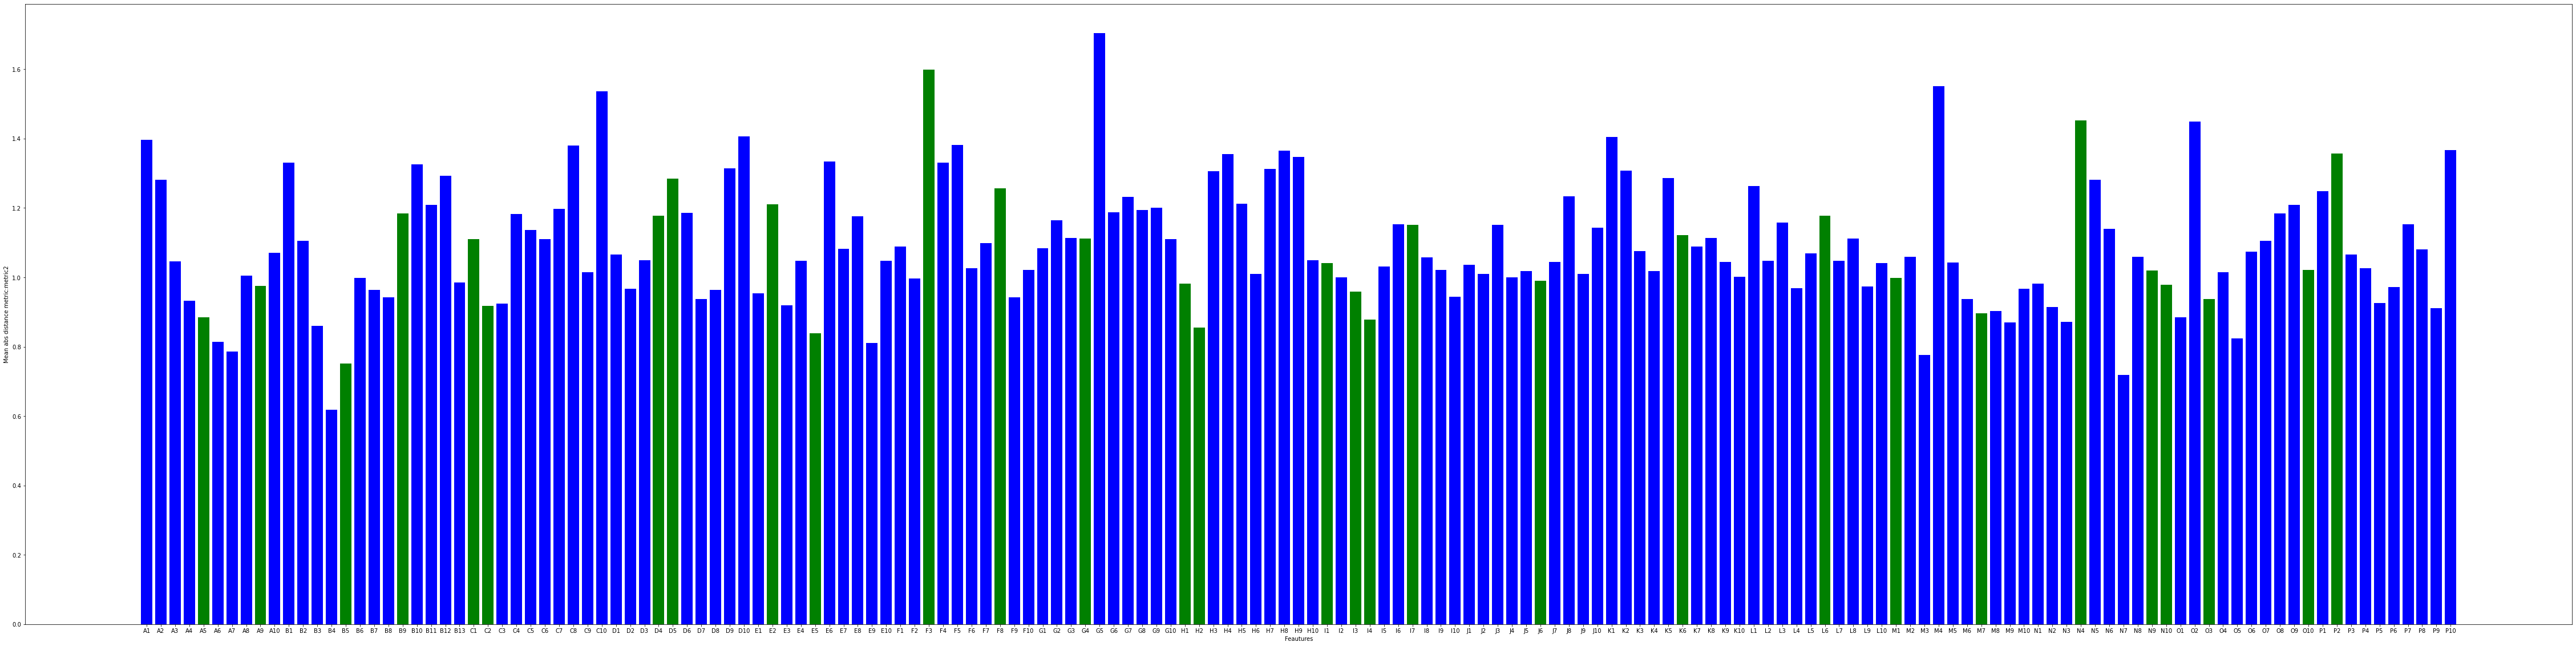

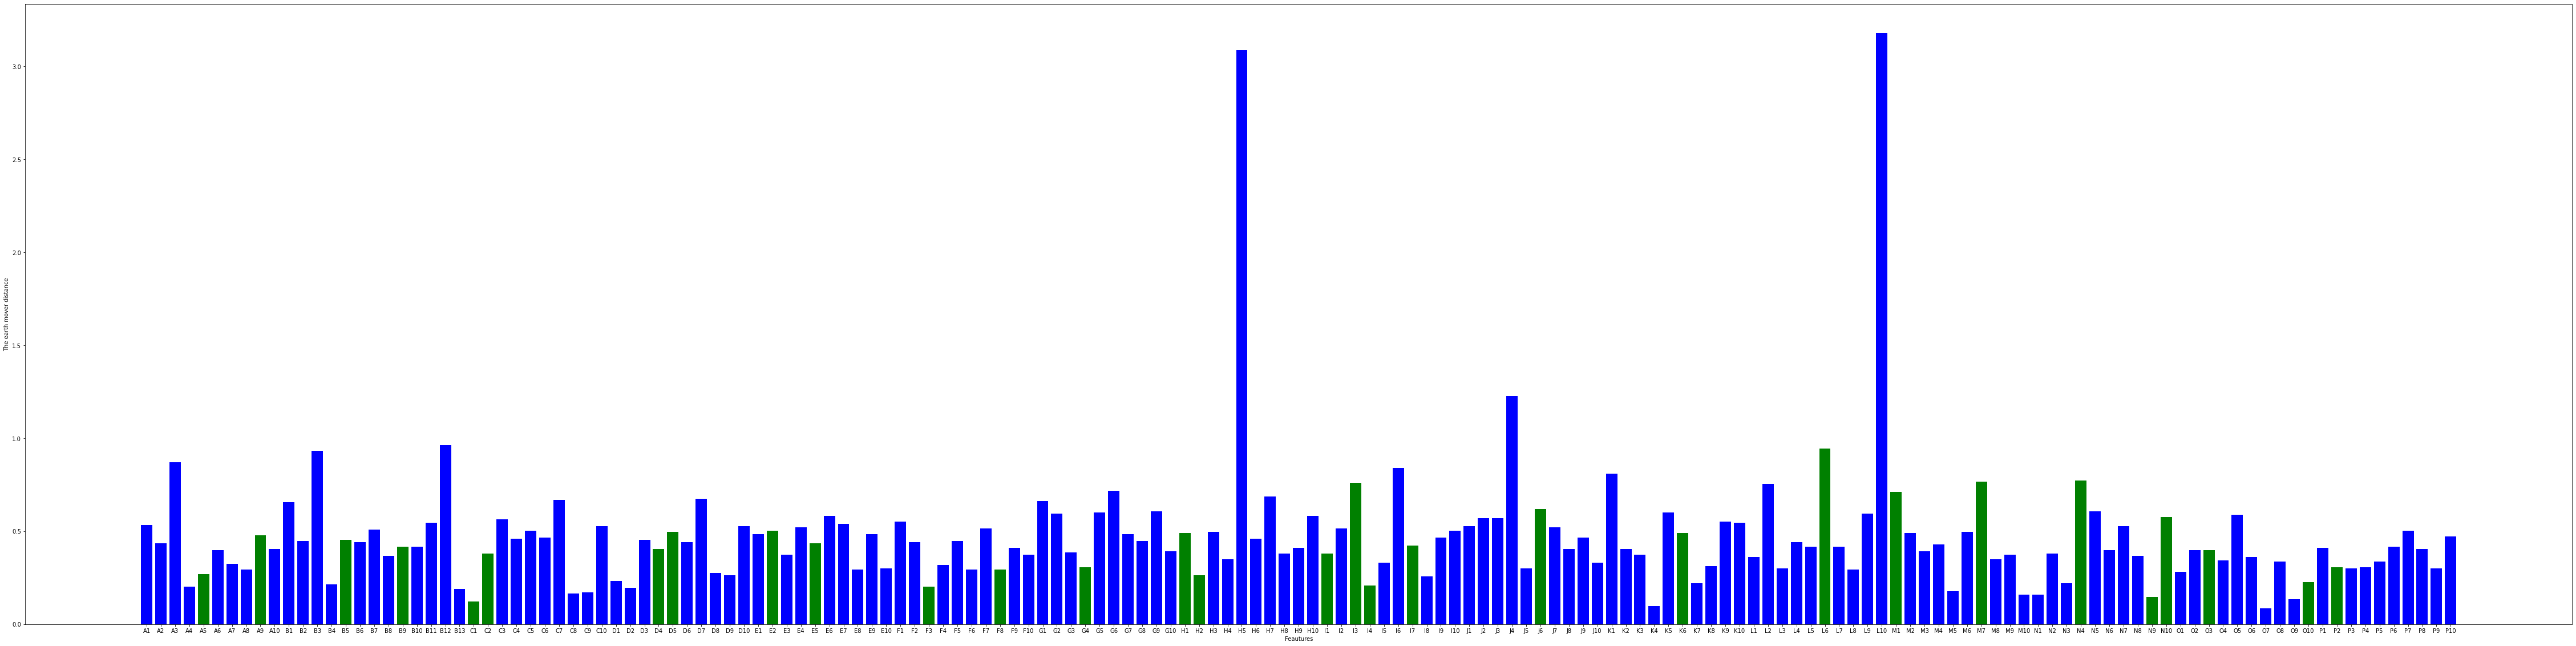

In [43]:
Ai2.CheckAccuracyFeatures(Ai2.x_train,preprocess.unscaled_y_train,train_mean,indices)

In [44]:
Ai2.CheckAccuracy(Ai2.x_test,preprocess.unscaled_y_test,train_mean)

Got 182063 / 653828 with accuracy 0.27846
tensor(1.0926, dtype=torch.float64)   accuracy  with second accuracy metric


In [46]:
Ai2.CheckAccuracy(Ai2.x_train,preprocess.unscaled_y_train,train_mean)

Got 1632916 / 5884319 with accuracy 0.27750
tensor(1.0977, dtype=torch.float64)   accuracy  with second accuracy metric


# Net3 tranpose conv1D + dense 

In [172]:
model = NeuralNetwork3()
lossFunction = nn.MSELoss()
learning_rate = 0.001
optimizer = optim.Adam(model.parameters(), lr = learning_rate) 
batch_size = 40
num_epochs = 15


In [173]:
Ai3 = UseNeuralNetwork(NeuralNetwork3,x_train,x_test,y_train,y_test,indices,optimizer=optimizer,lr_rate=lr_rate,batch_size=batch_size,num_epochs=num_epochs,loss=lossFunction)


In [174]:
Ai3.TrainNN(group_split_ind,weights)

Epoch: 0
loss:  tensor(11.2554, grad_fn=<DivBackward0>)
Epoch: 1
loss:  tensor(9.7256, grad_fn=<DivBackward0>)
Epoch: 2
loss:  tensor(9.4278, grad_fn=<DivBackward0>)
Epoch: 3
loss:  tensor(9.2602, grad_fn=<DivBackward0>)
Epoch: 4
loss:  tensor(9.1569, grad_fn=<DivBackward0>)
Epoch: 5
loss:  tensor(18.2178, grad_fn=<DivBackward0>)
Epoch: 6
loss:  tensor(17.5508, grad_fn=<DivBackward0>)
Epoch: 7
loss:  tensor(17.3440, grad_fn=<DivBackward0>)
Epoch: 8
loss:  tensor(17.1770, grad_fn=<DivBackward0>)
Epoch: 9
loss:  tensor(17.0358, grad_fn=<DivBackward0>)
Epoch: 10
loss:  tensor(16.9252, grad_fn=<DivBackward0>)
Epoch: 11
loss:  tensor(16.7858, grad_fn=<DivBackward0>)
Epoch: 12
loss:  tensor(16.6821, grad_fn=<DivBackward0>)
Epoch: 13
loss:  tensor(16.5585, grad_fn=<DivBackward0>)
Epoch: 14
loss:  tensor(16.4379, grad_fn=<DivBackward0>)


In [178]:
Ai3.CheckAccuracy(Ai3.x_train,preprocess.unscaled_y_train,train_mean)

pred torch.Size([4916, 133])
Got 197277 / 653828 with accuracy 0.30173
tensor(0.9532, dtype=torch.float64)   accuracy  with second accuracy metric


In [179]:
Ai3.CheckAccuracy(Ai3.x_test,preprocess.unscaled_y_test,train_mean)

pred torch.Size([44243, 133])
Got 1785431 / 5884319 with accuracy 0.30342
tensor(0.9532, dtype=torch.float64)   accuracy  with second accuracy metric


In [ ]:
#old accuracy_test 1st metric = 0.49605  2-nd metric 0.6594
#old accurcy_train 1st metric = 0.50019  2-nd metric 0.6520

# Net4

In [186]:
model = NeuralNetwork4()
lossFunction = nn.SmoothL1Loss()
lr = 0.01
batch_size = 30
num_epochs = 20
#optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9) 
optimizer = optim.Adam(model.parameters(), lr = learning_rate) 


In [187]:
Ai4 = UseNeuralNetwork(NeuralNetwork4,x_train,x_test,y_train,y_test,indices,optimizer=optimizer,lr_rate=lr_rate,batch_size=batch_size,num_epochs=num_epochs,loss=lossFunction)


In [188]:
Ai4.TrainNN(group_split_ind,weights)

Epoch: 0
loss:  tensor(3.0887, grad_fn=<DivBackward0>)
Epoch: 1
loss:  tensor(2.8257, grad_fn=<DivBackward0>)
Epoch: 2
loss:  tensor(2.7960, grad_fn=<DivBackward0>)
Epoch: 3
loss:  tensor(2.7795, grad_fn=<DivBackward0>)
Epoch: 4
loss:  tensor(2.7655, grad_fn=<DivBackward0>)
Epoch: 5
loss:  tensor(6.1166, grad_fn=<DivBackward0>)
Epoch: 6
loss:  tensor(6.0556, grad_fn=<DivBackward0>)
Epoch: 7
loss:  tensor(6.0352, grad_fn=<DivBackward0>)
Epoch: 8
loss:  tensor(6.0259, grad_fn=<DivBackward0>)
Epoch: 9
loss:  tensor(6.0135, grad_fn=<DivBackward0>)
Epoch: 10
loss:  tensor(6.0089, grad_fn=<DivBackward0>)
Epoch: 11
loss:  tensor(6.0015, grad_fn=<DivBackward0>)
Epoch: 12
loss:  tensor(5.9939, grad_fn=<DivBackward0>)
Epoch: 13
loss:  tensor(5.9870, grad_fn=<DivBackward0>)
Epoch: 14
loss:  tensor(5.9812, grad_fn=<DivBackward0>)
Epoch: 15
loss:  tensor(5.9807, grad_fn=<DivBackward0>)
Epoch: 16
loss:  tensor(5.9738, grad_fn=<DivBackward0>)
Epoch: 17
loss:  tensor(5.9658, grad_fn=<DivBackward0>)
Ep

In [191]:
Ai4.CheckAccuracy(Ai4.x_train,preprocess.unscaled_y_train,train_mean)

pred torch.Size([4916, 133])
Got 266555 / 653828 with accuracy 0.40768
tensor(0.7686, dtype=torch.float64)   accuracy  with second accuracy metric


In [192]:
Ai4.CheckAccuracy(Ai4.x_test,preprocess.unscaled_y_test,train_mean)

pred torch.Size([44243, 133])
Got 2417509 / 5884319 with accuracy 0.41084
tensor(0.7642, dtype=torch.float64)   accuracy  with second accuracy metric


# Net5 conv1d with max pooling (bad result)

In [309]:
#Convolution 1D
class NeuralNetwork5(nn.Module): 
    def __init__(self):  
        super(NeuralNetwork5, self).__init__()
        self.input = nn.Linear(166,500)
        self.hidden1= nn.Linear(500,300)

        self.conv1 = torch.nn.Conv1d(in_channels=1, out_channels=1, kernel_size=30, stride=1,
                        padding=0, dilation=1, groups=1, bias=True, 
                        padding_mode='zeros', device=None, dtype=None)
        self.max_pool = torch.nn.MaxPool1d(kernel_size=4, stride=None, padding=0, dilation=1, return_indices=False, ceil_mode=False)
        self.relu = nn.ReLU()
        self.hidden2 = nn.Linear(67,120)
        self.output = nn.Linear(120,163)
        

    def forward(self,x):
        x = self.relu(x)
        x = self.input(x)
        x = self.relu(x)
        x = self.hidden1(x)
        x = self.relu(x)
        x = self.conv1(x)
        x = self.relu(x)

        x=self.max_pool(x)
        x = self.hidden2(x)
        x = self.relu(x)
        x = self.output(x)
        return x

In [310]:
model = NeuralNetwork5()
preprocess = DataPreprocessing()
lossFunction = nn.MSELoss()
#lossFunction = nn.SmoothL1Loss()
indices = preprocess.RandomChoice()
lr_rate = 0.001
batch_size = 33
num_epochs = 10
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9) 
#optimizer = optim.Adam(model.parameters(), lr = learning_rate) 


In [311]:
Ai5 = UseNeuralNetwork(NeuralNetwork5,indices,optimizer,lr_rate=lr_rate,batch_size=batch_size,num_epochs=num_epochs,loss=loss)


In [312]:
Ai5.TrainNN() 

Epoch: 0
loss:  tensor(16.8960, grad_fn=<DivBackward0>)
Epoch: 1
loss:  tensor(16.8893, grad_fn=<DivBackward0>)
Epoch: 2
loss:  tensor(16.8874, grad_fn=<DivBackward0>)
Epoch: 3
loss:  tensor(16.8868, grad_fn=<DivBackward0>)
Epoch: 4
loss:  tensor(16.8885, grad_fn=<DivBackward0>)
Epoch: 5
loss:  tensor(39.9751, grad_fn=<DivBackward0>)
Epoch: 6
loss:  tensor(39.9762, grad_fn=<DivBackward0>)
Epoch: 7
loss:  tensor(39.9770, grad_fn=<DivBackward0>)
Epoch: 8
loss:  tensor(39.9668, grad_fn=<DivBackward0>)
Epoch: 9
loss:  tensor(39.9648, grad_fn=<DivBackward0>)


In [304]:
Ai5.CheckAccuracy(Ai5.x_test, Ai5.preprocess.unscaled_y_test) 

Got 129142 / 653828 with accuracy 0.19752
tensor(3.0596, dtype=torch.float64)   accuracy  with second accuracy metric


In [302]:
#old accuracy_test 1st metric = 0.47605  2-nd metric 0.6594
#old accurcy_train 1st metric = 0.47019  2-nd metric 0.6520

In [303]:
Ai5.CheckAccuracy(Ai5.x_train,preprocess.unscaled_y_train,train_mean)

Got 1167507 / 5884319 with accuracy 0.19841
tensor(3.0619, dtype=torch.float64)   accuracy  with second accuracy metric


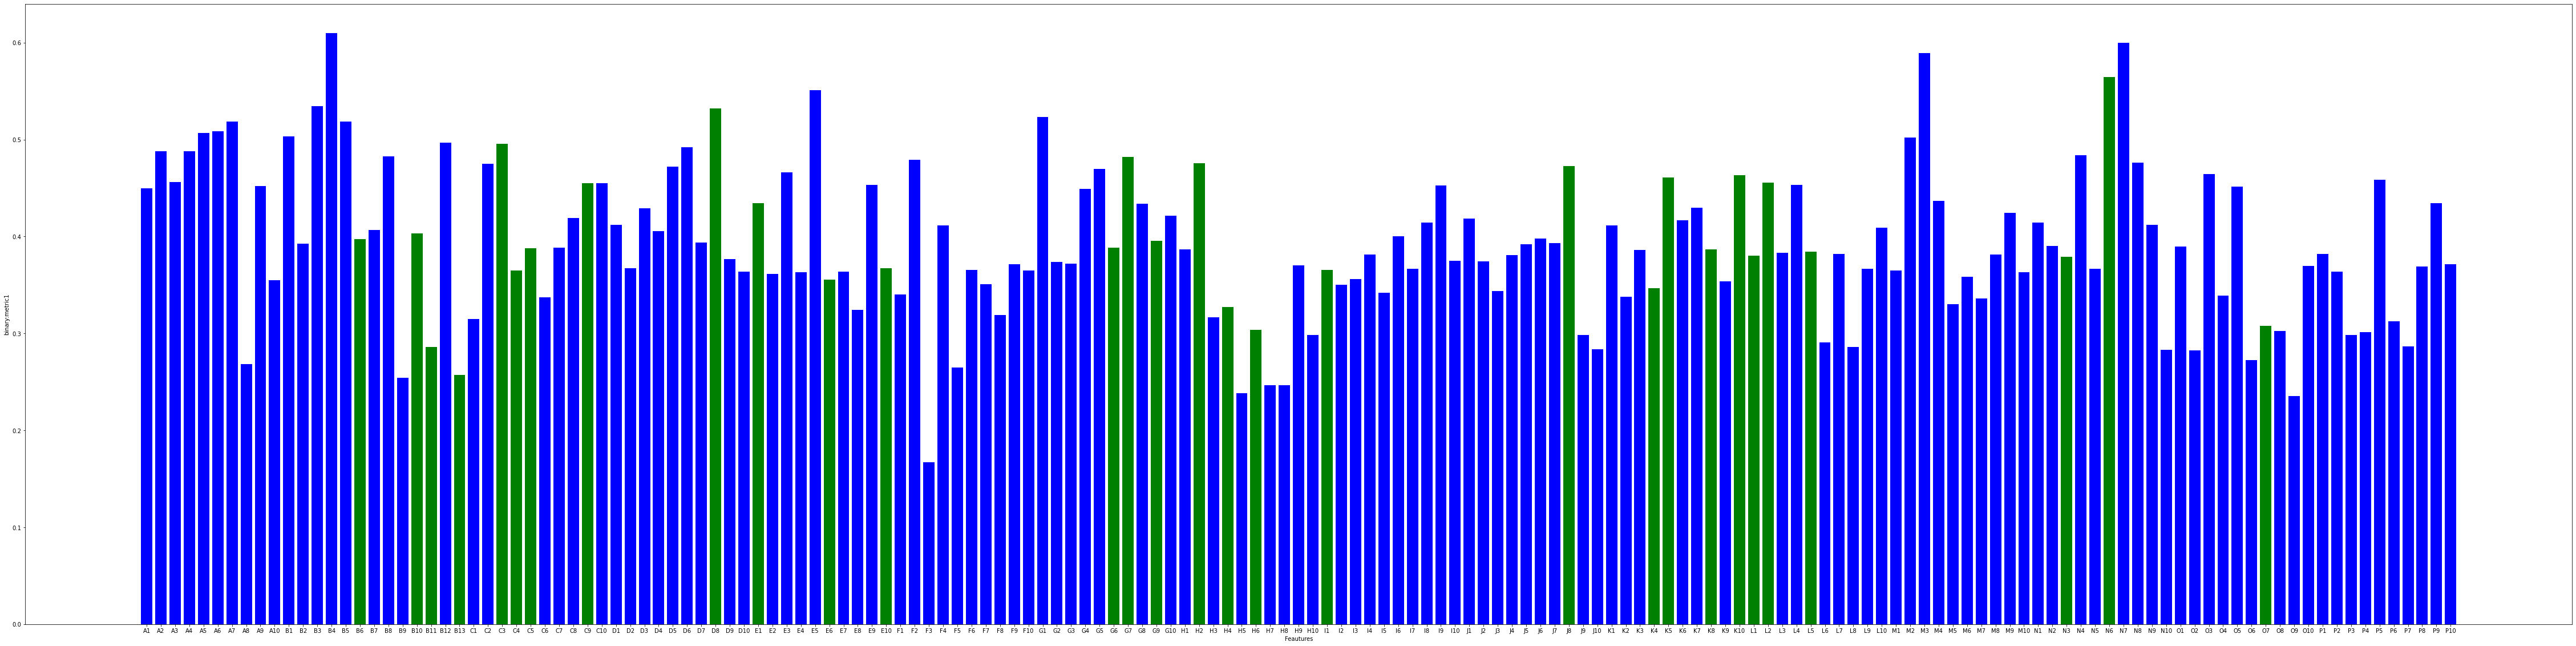

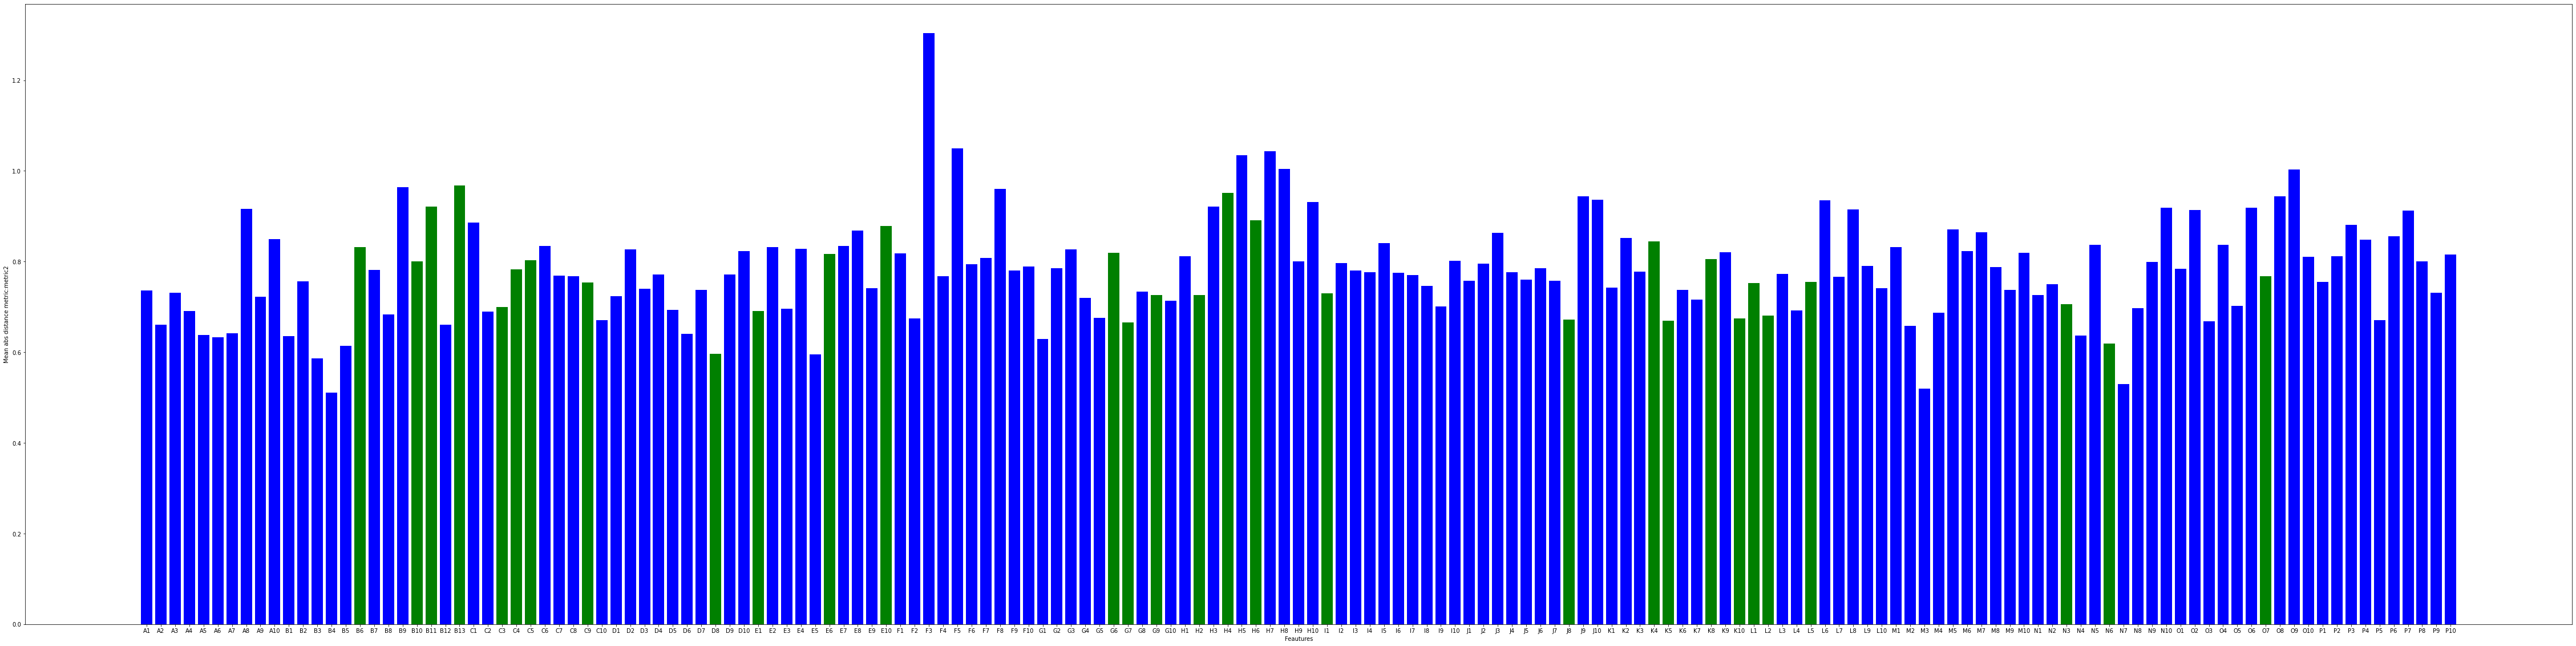

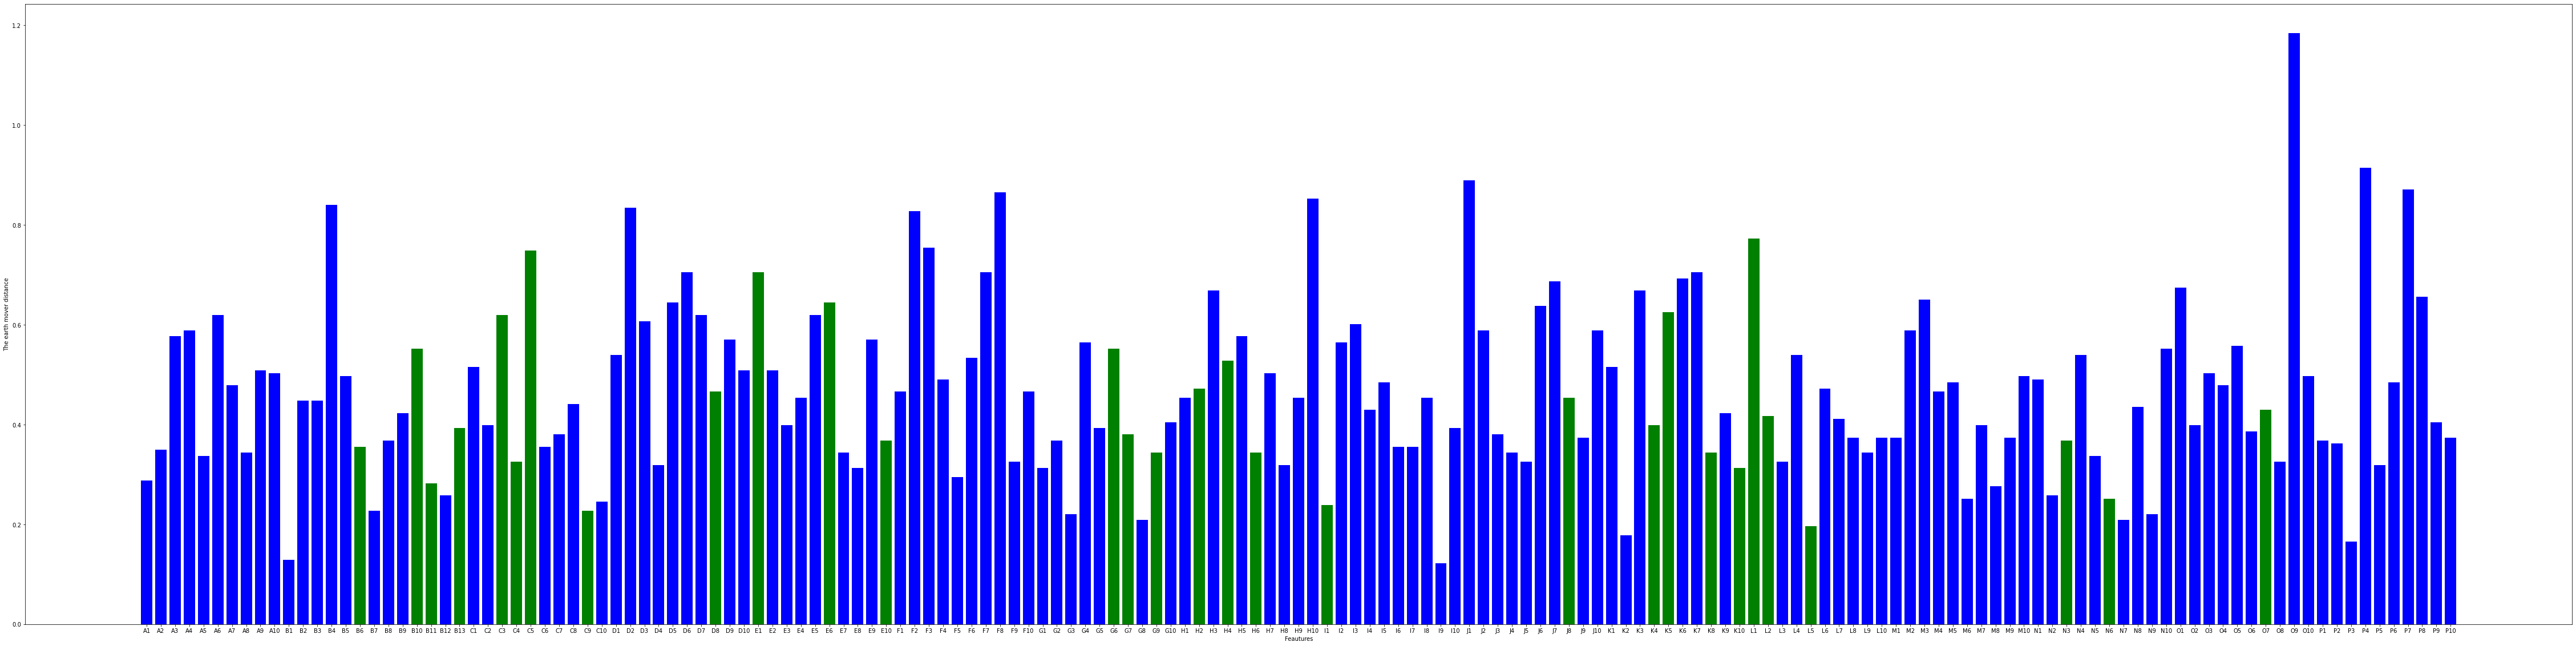

In [243]:
Ai5.CheckAccuracy(Ai5.x_test,preprocess.unscaled_y_test,train_mean)

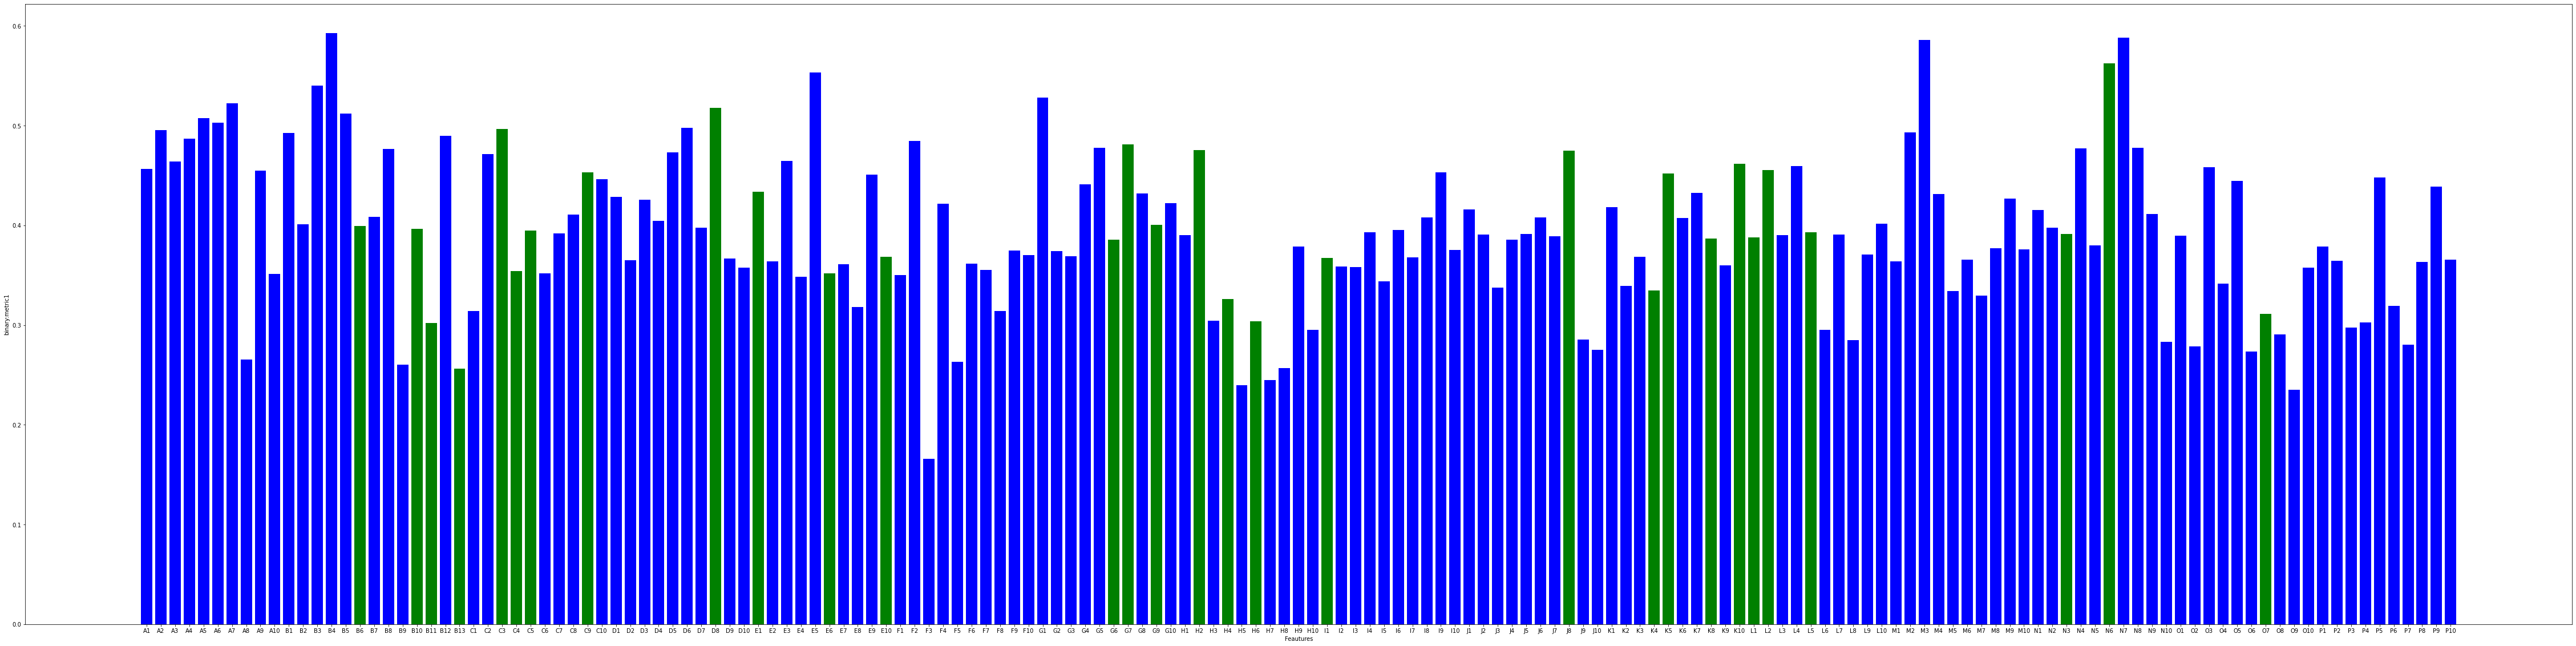

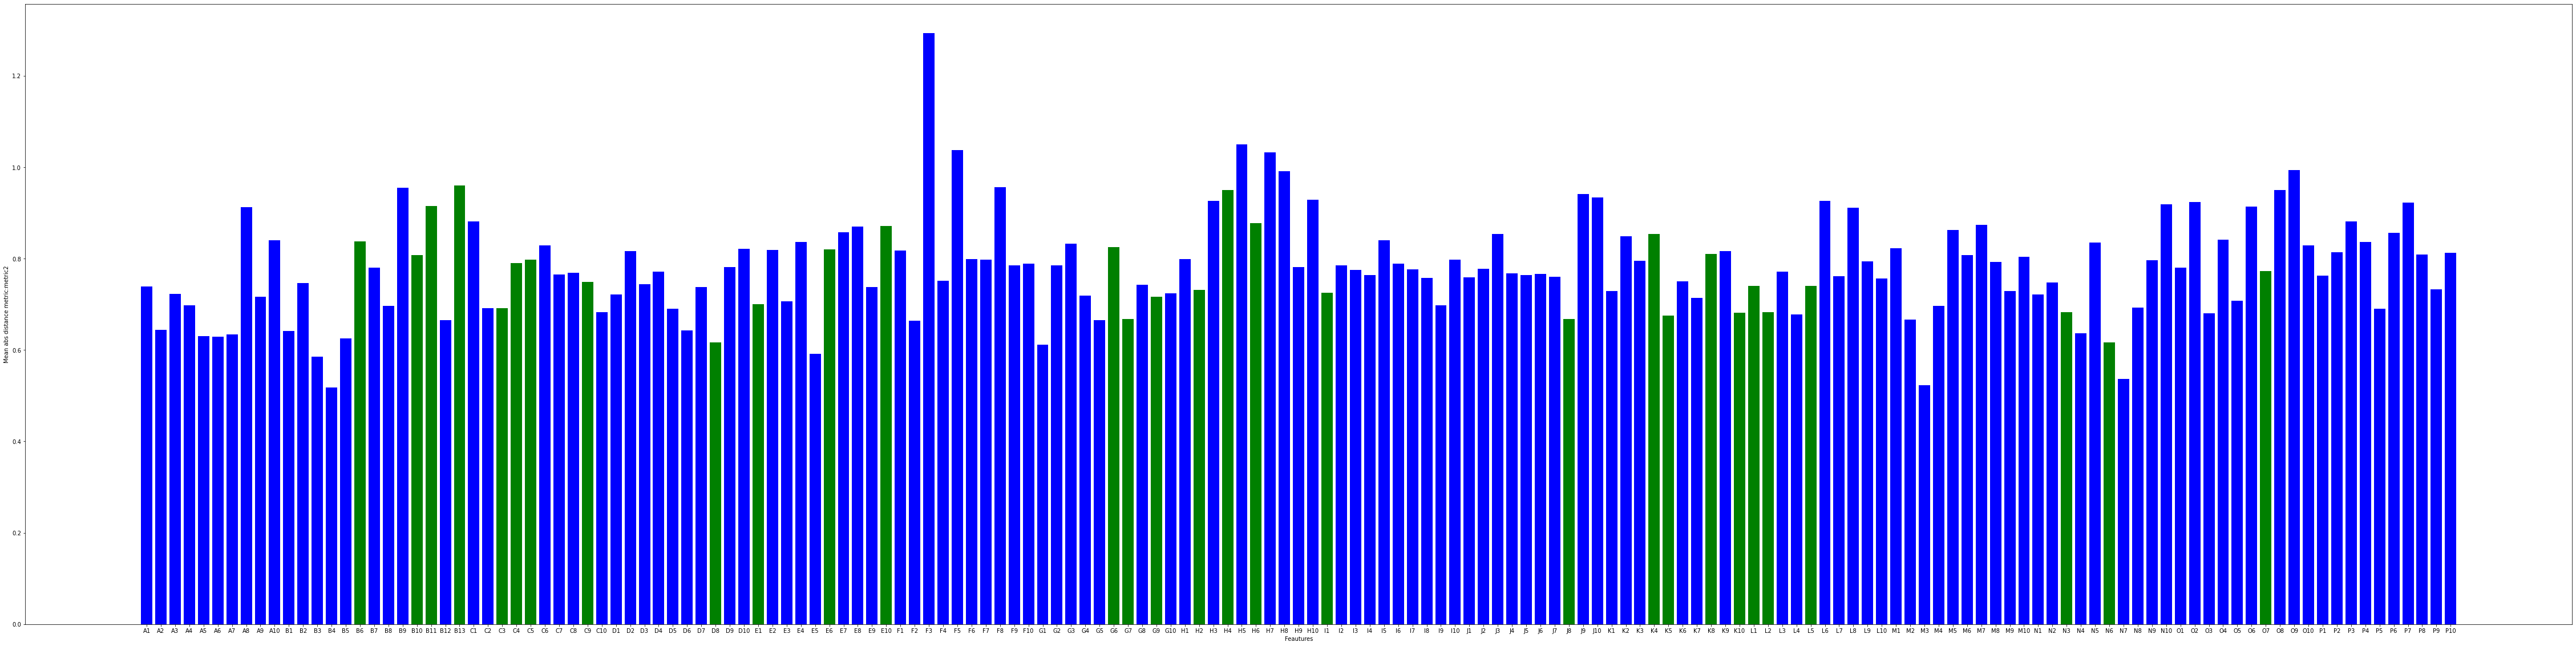

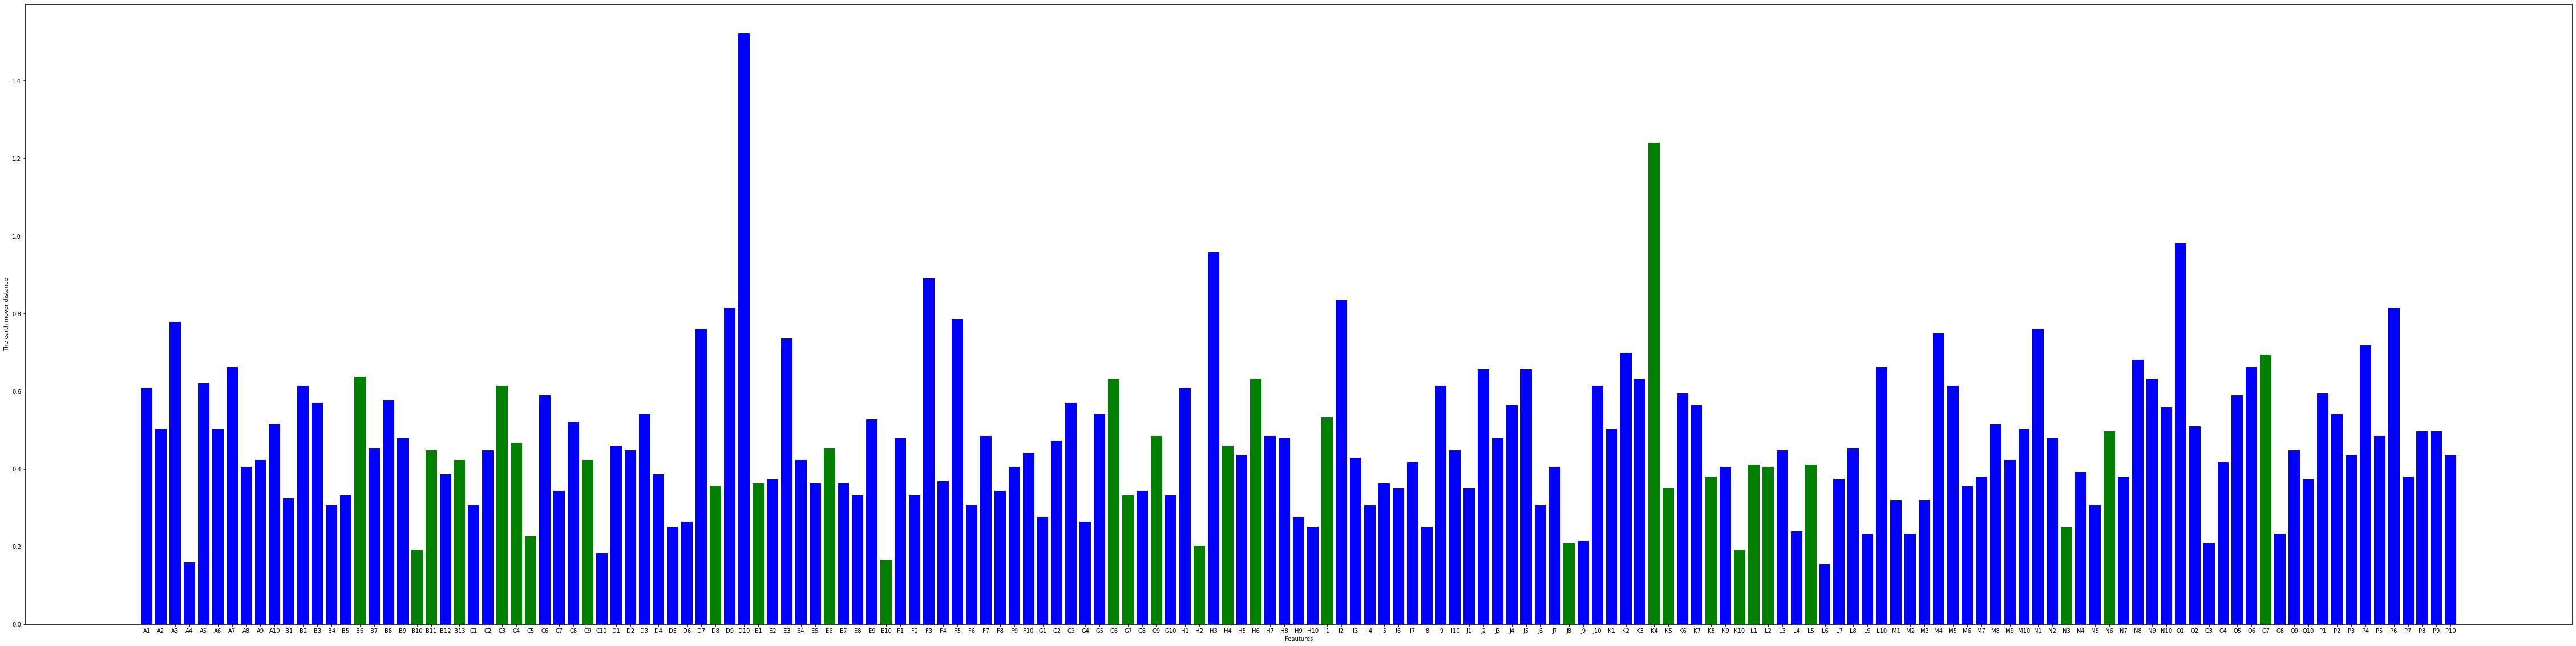

In [244]:
Ai5.CheckAccuracyFeatures(Ai5.x_train,Ai5.preprocess.unscaled_y_train)

# dense layers with tanh


In [4]:
#Dense layers
class NeuralNetwork6(nn.Module): 
    def __init__(self):  
        super(NeuralNetwork6, self).__init__()
        self.input = nn.Linear(166,560)
        self.hidden1= nn.Linear(560,360)
        self.hidden2= nn.Linear(760,900)
        self.hidden3= nn.Linear(900,760)
        self.hidden4= nn.Linear(760,563)
        self.output = nn.Linear(360,163)
        self.tanh = nn.Tanh()
        
    def forward(self,x):
        x = self.input(x)
        x = self.tanh(x)
        x = self.hidden1(x)
        x = self.tanh(x)
        
        x = self.hidden2(x)
        x = self.tanh(x)
        x = self.hidden3(x)
        x = self.tanh(x)
        x = self.hidden4(x)
        x = self.tanh(x)
        x = self.output(x)  
        return x


In [ ]:
model = NeuralNetwork6()
#lossFunction = nn.MSELoss()
lossFunction = nn.SmoothL1Loss()
indices = preprocess.RandomChoice()
lr_rate = 0.001
batch_size = 16
num_epochs = 10
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9) 
#optimizer = optim.Adam(model.parameters(), lr = learning_rate) 


In [322]:
Ai6 = UseNeuralNetwork(NeuralNetwork6,indices,optimizer,lr_rate=lr_rate,batch_size=batch_size,num_epochs=num_epochs,loss=loss)


In [317]:
Ai6.CheckAccuracy(Ai6.x_test, Ai6.preprocess.unscaled_y_test) 

Got 114630 / 653828 with accuracy 0.17532
tensor(3.5390, dtype=torch.float64)   accuracy  with second accuracy metric


In [318]:
Ai5.CheckAccuracy(Ai6.x_train,Ai6.preprocess.unscaled_y_train) 

Got 1194336 / 5884319 with accuracy 0.20297
tensor(3.3124, dtype=torch.float64)   accuracy  with second accuracy metric


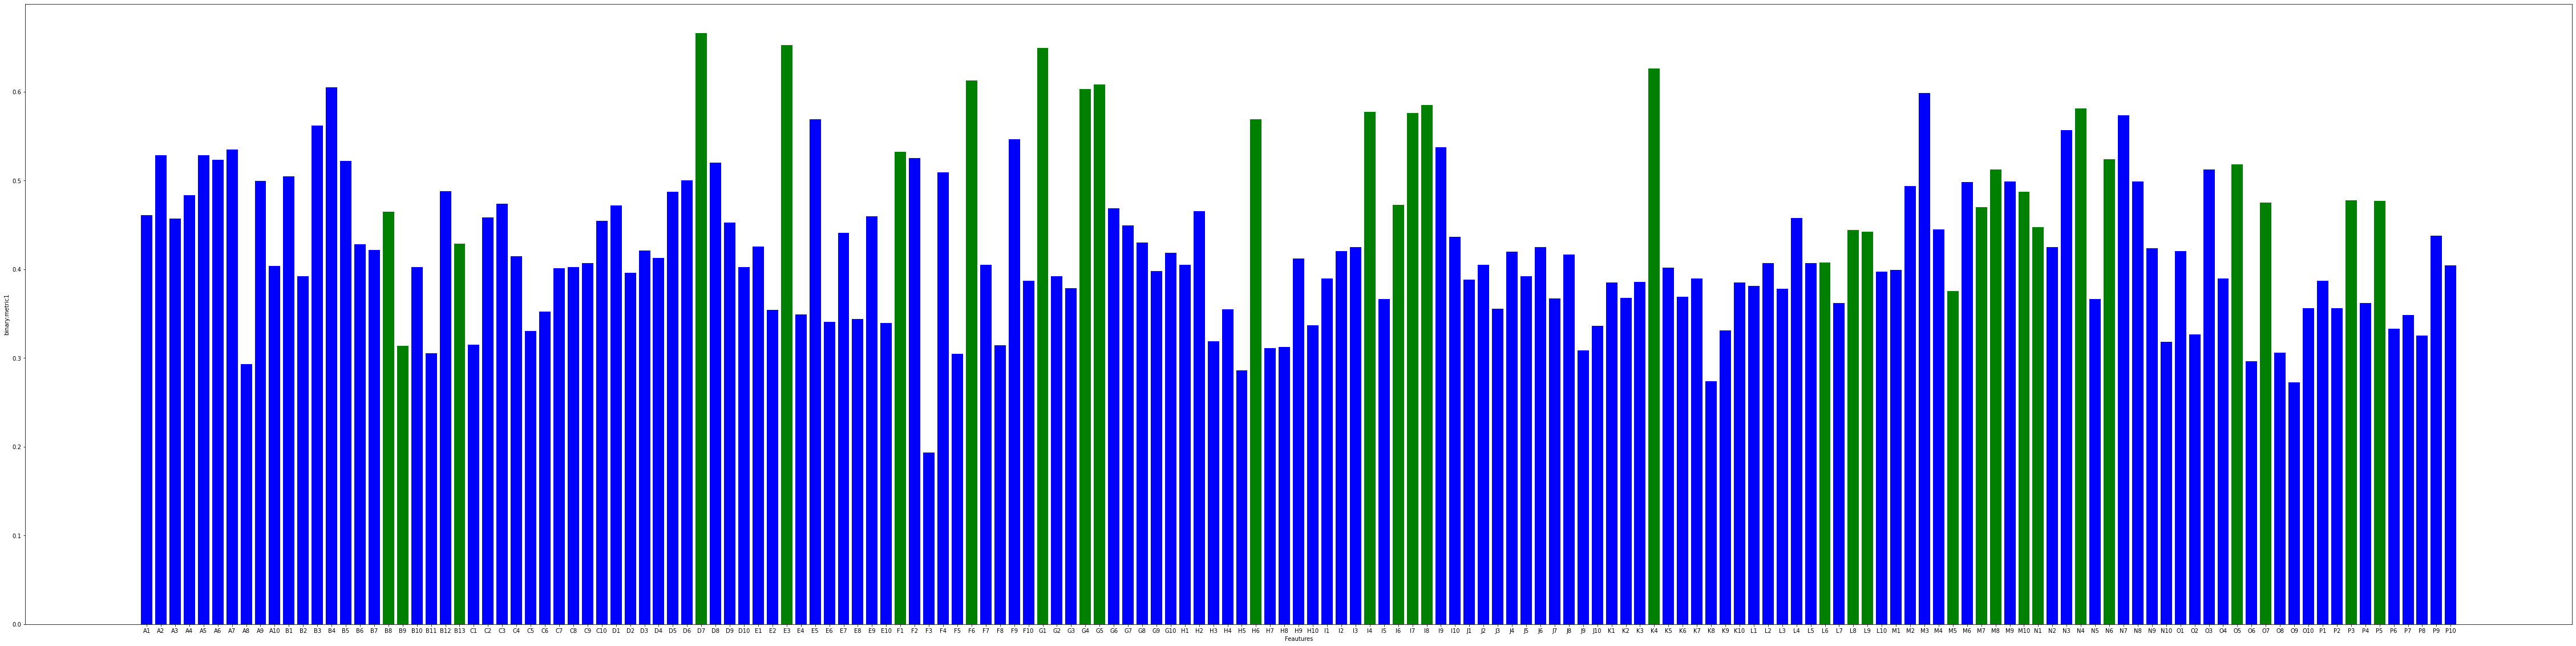

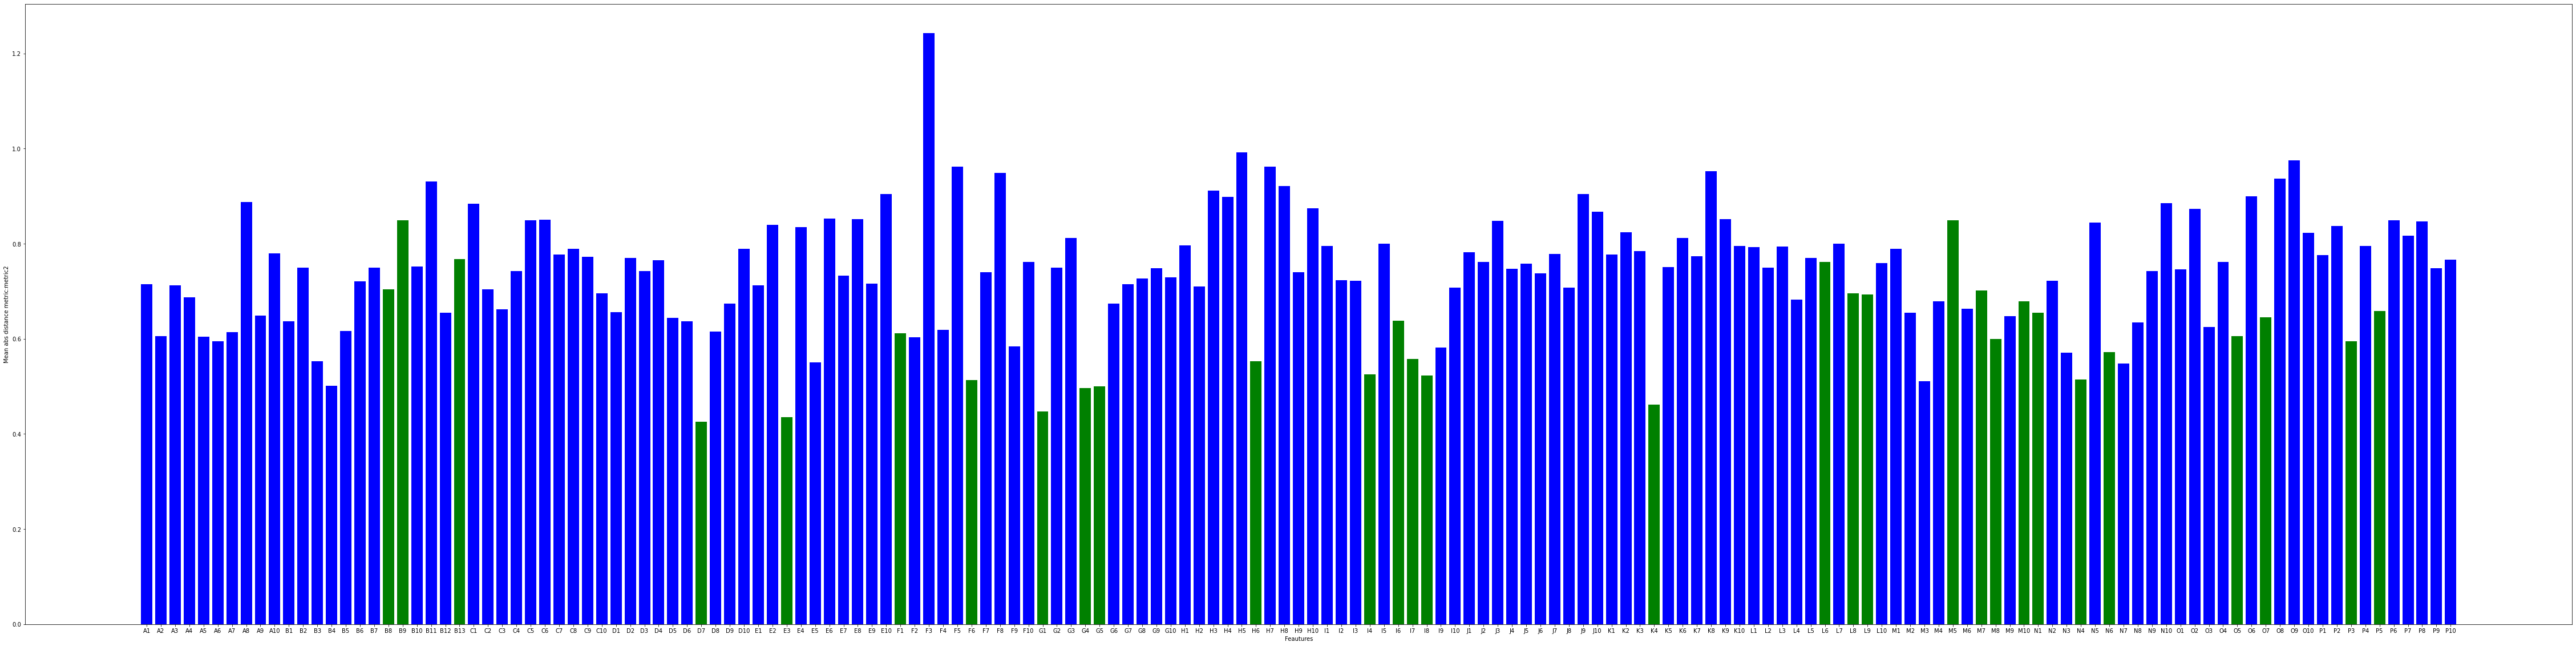

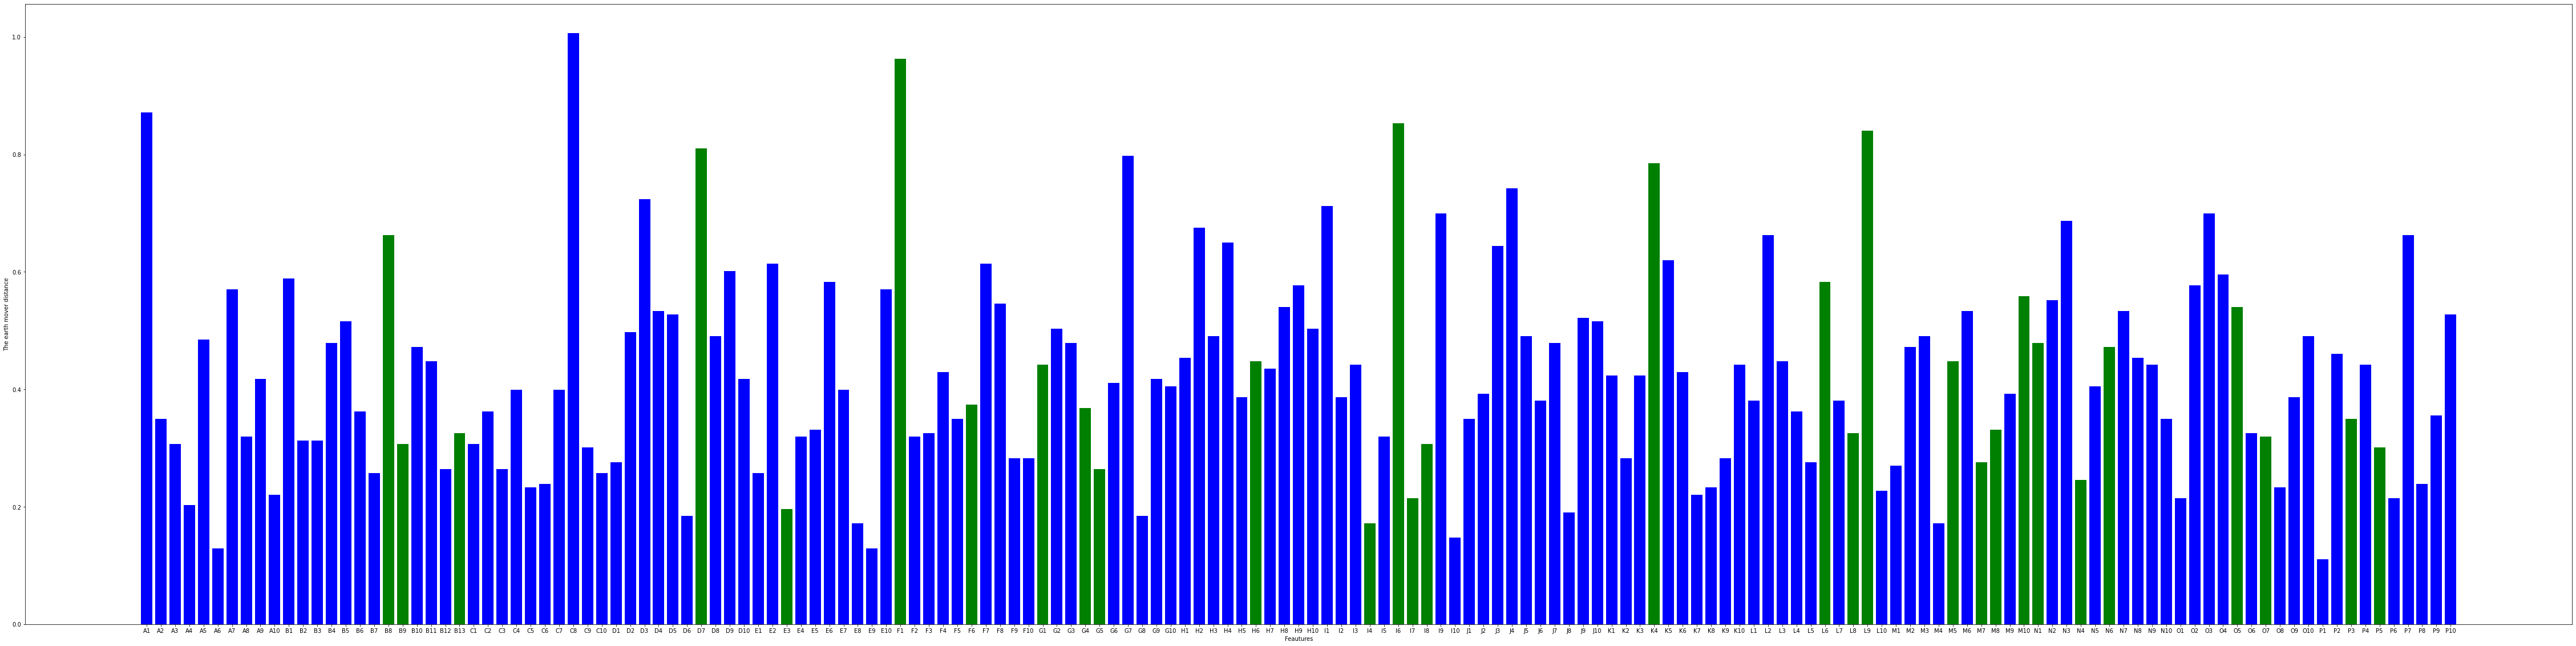

In [319]:
Ai5.CheckAccuracyFeatures(Ai6.x_train,Ai6.preprocess.unscaled_y_train)

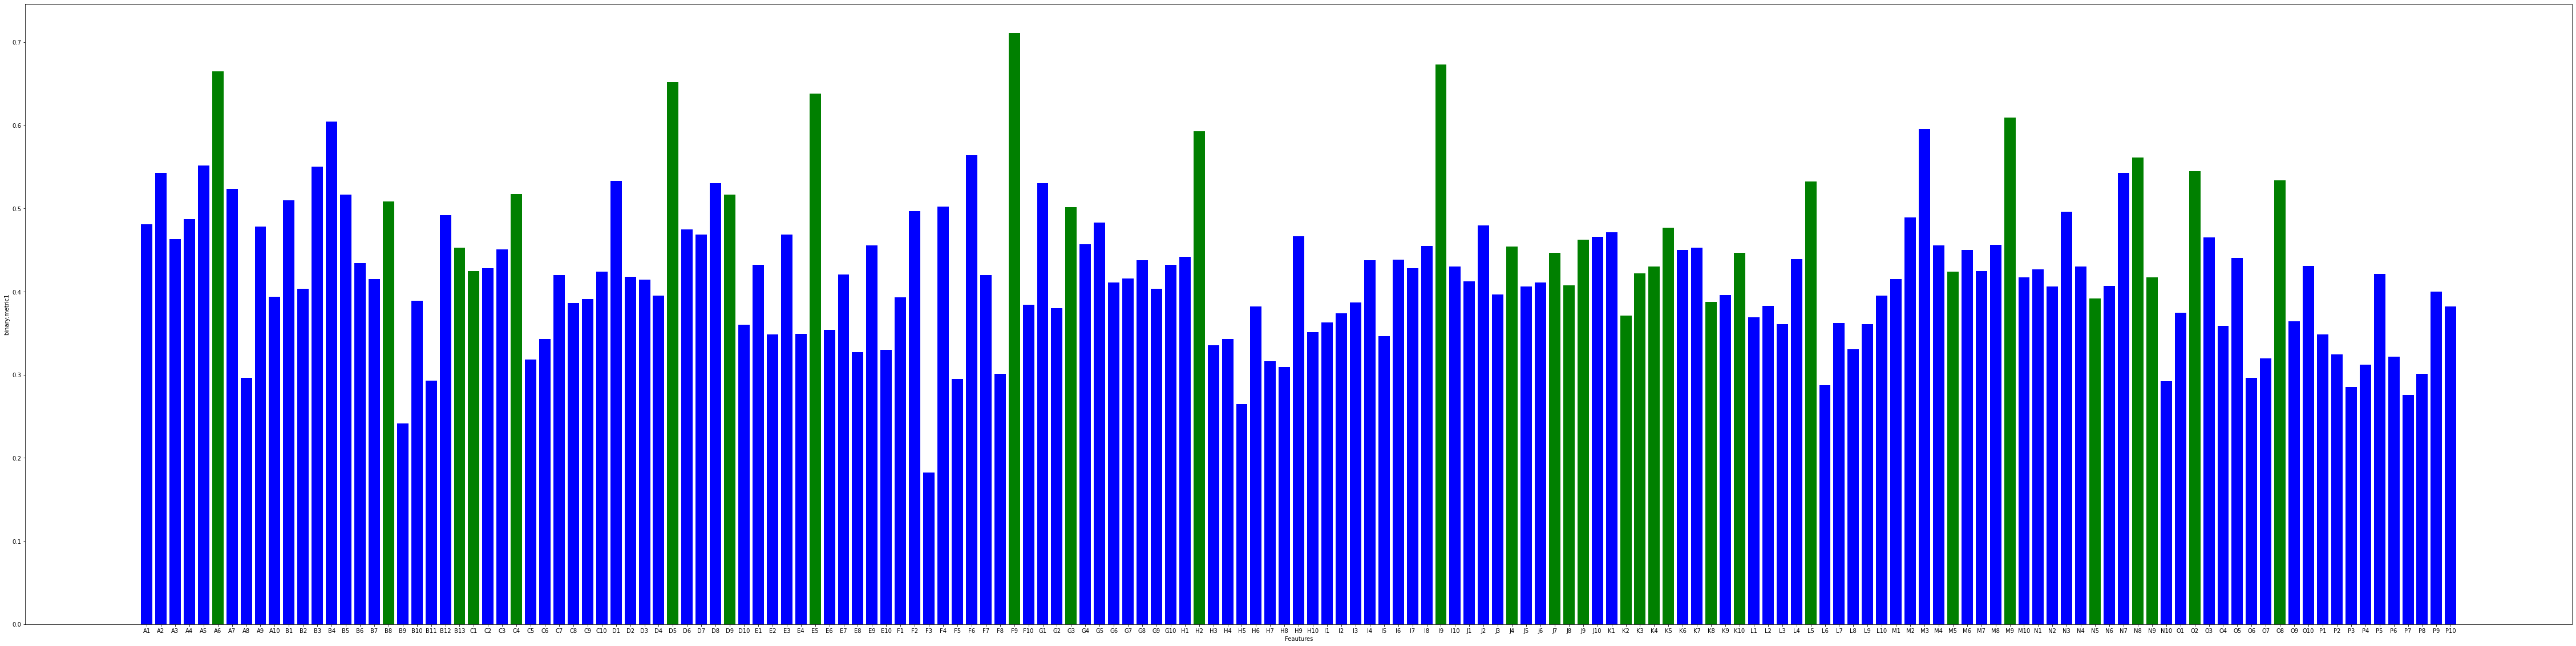

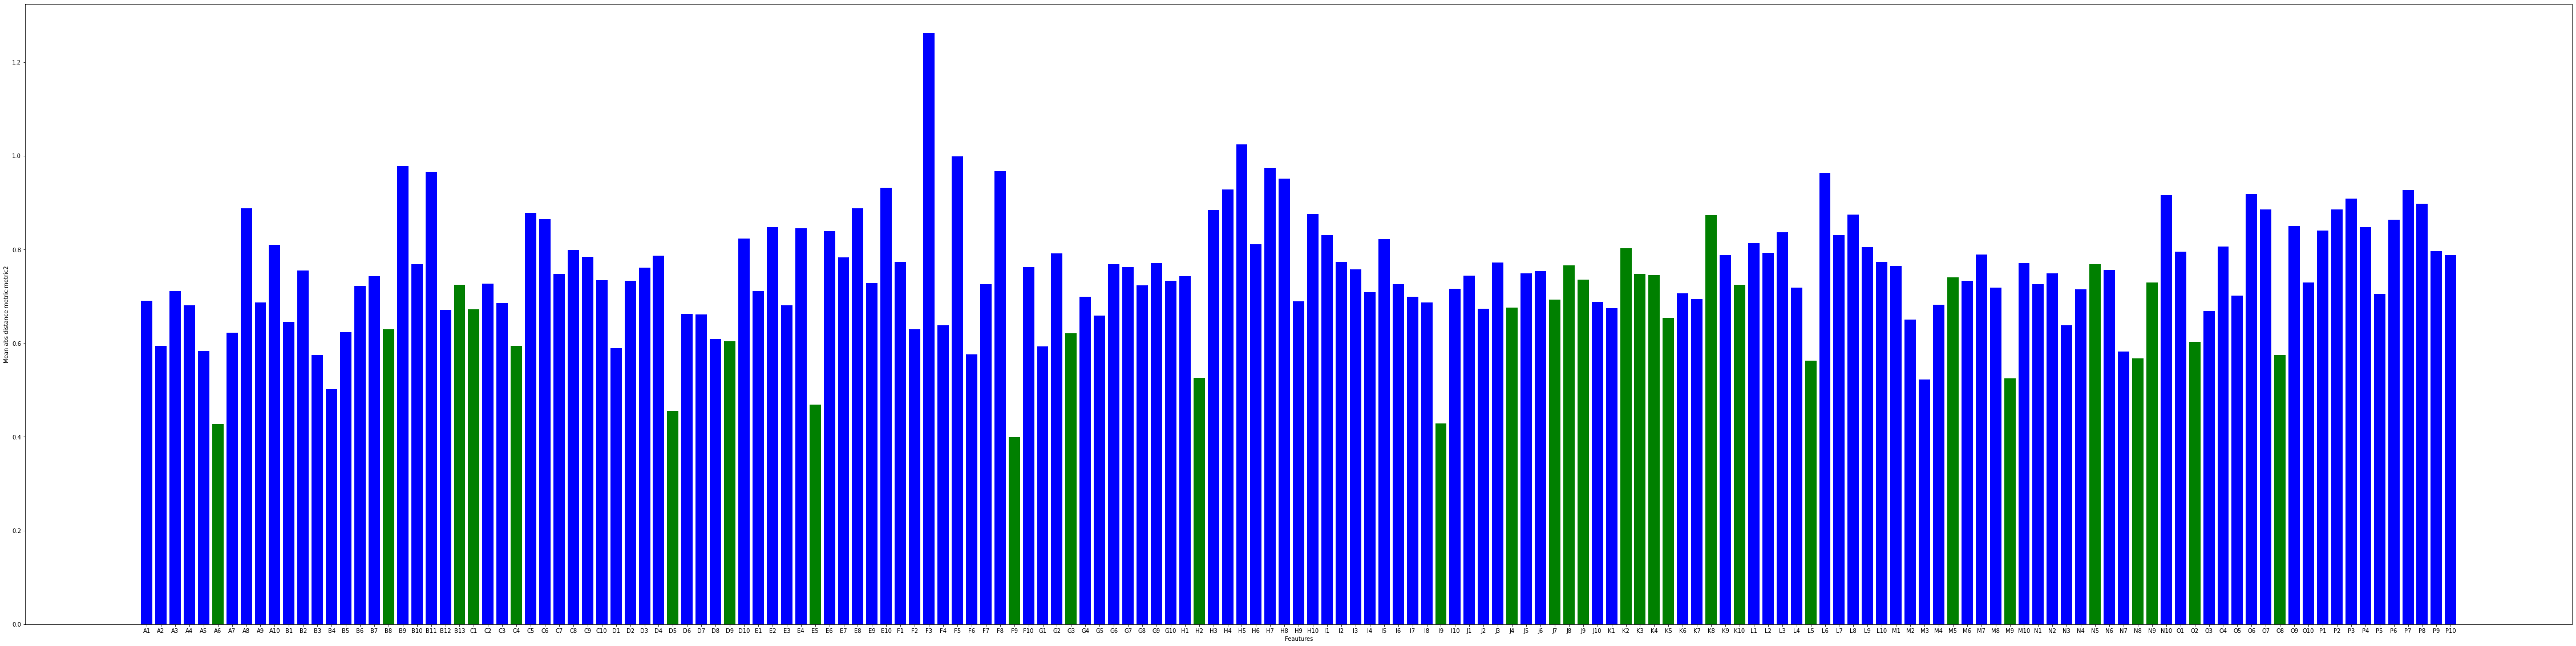

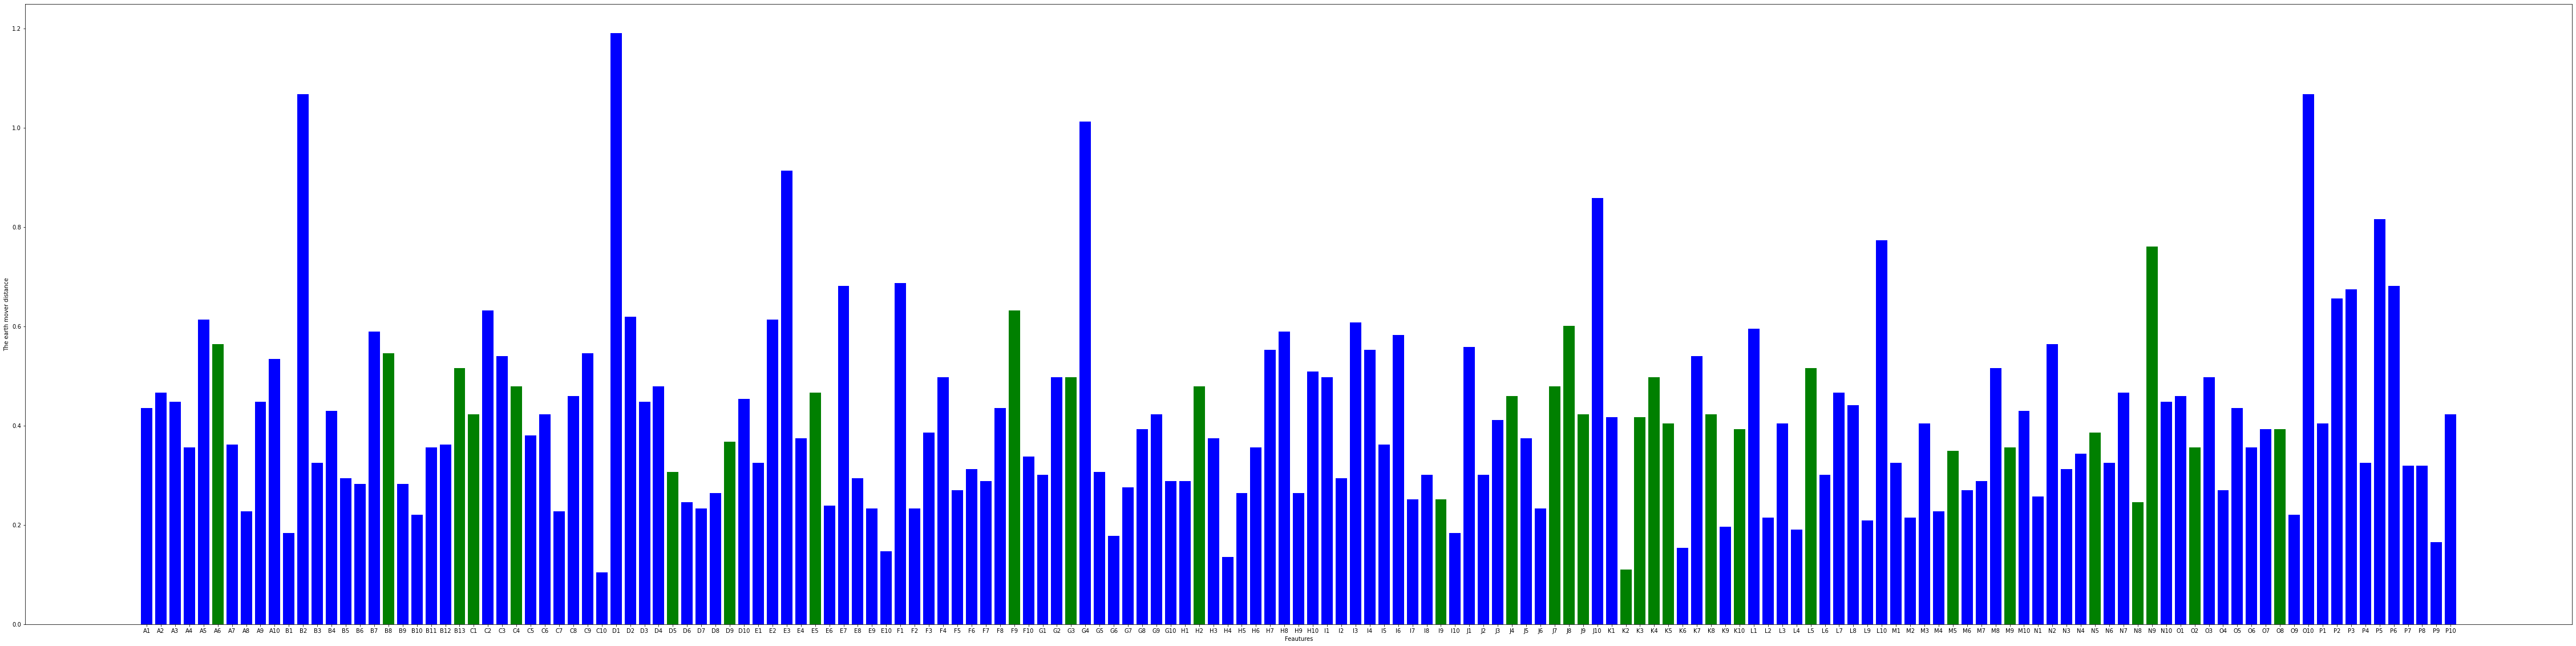

In [273]:
Ai5.CheckAccuracyFeatures(Ai6.x_test,Ai6.preprocess.unscaled_y_test)